- understand the problem
- recognise the task
- preprocess + EDA + feature selection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# %matplootlib inline

In [2]:
data = pd.read_csv("CO2 Emissions_Canada.csv")

In [3]:
data.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
data.shape

(7385, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
# Cheak duplicate values
data.duplicated().sum()

1103

In [7]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [8]:
data.shape

(6282, 12)

In [9]:
# Cheak null values
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [10]:
print('Fule Type :',data['Fuel Type'].unique())
print('Cylinders :',data['Cylinders'].unique())
print('Vehicle Class :',data['Vehicle Class'].unique())
print('Transmission :',data['Transmission'].unique())
print('Model :',data['Model'].unique())
print('Make  :',data['Make'].unique())

Fule Type : ['Z' 'D' 'X' 'E' 'N']
Cylinders : [ 4  6 12  8 10  3  5 16]
Vehicle Class : ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']
Transmission : ['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9' 'AS9' 'AV6' 'AS4' 'AM5' 'AM8' 'AM9' 'AS10'
 'A10' 'AV10']
Model : ['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']
Make  : ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION'

In [11]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [12]:
data.shape

(6282, 12)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2 Emissions(g/km)               6282 non-null   int64  
dtypes: flo

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Density'>

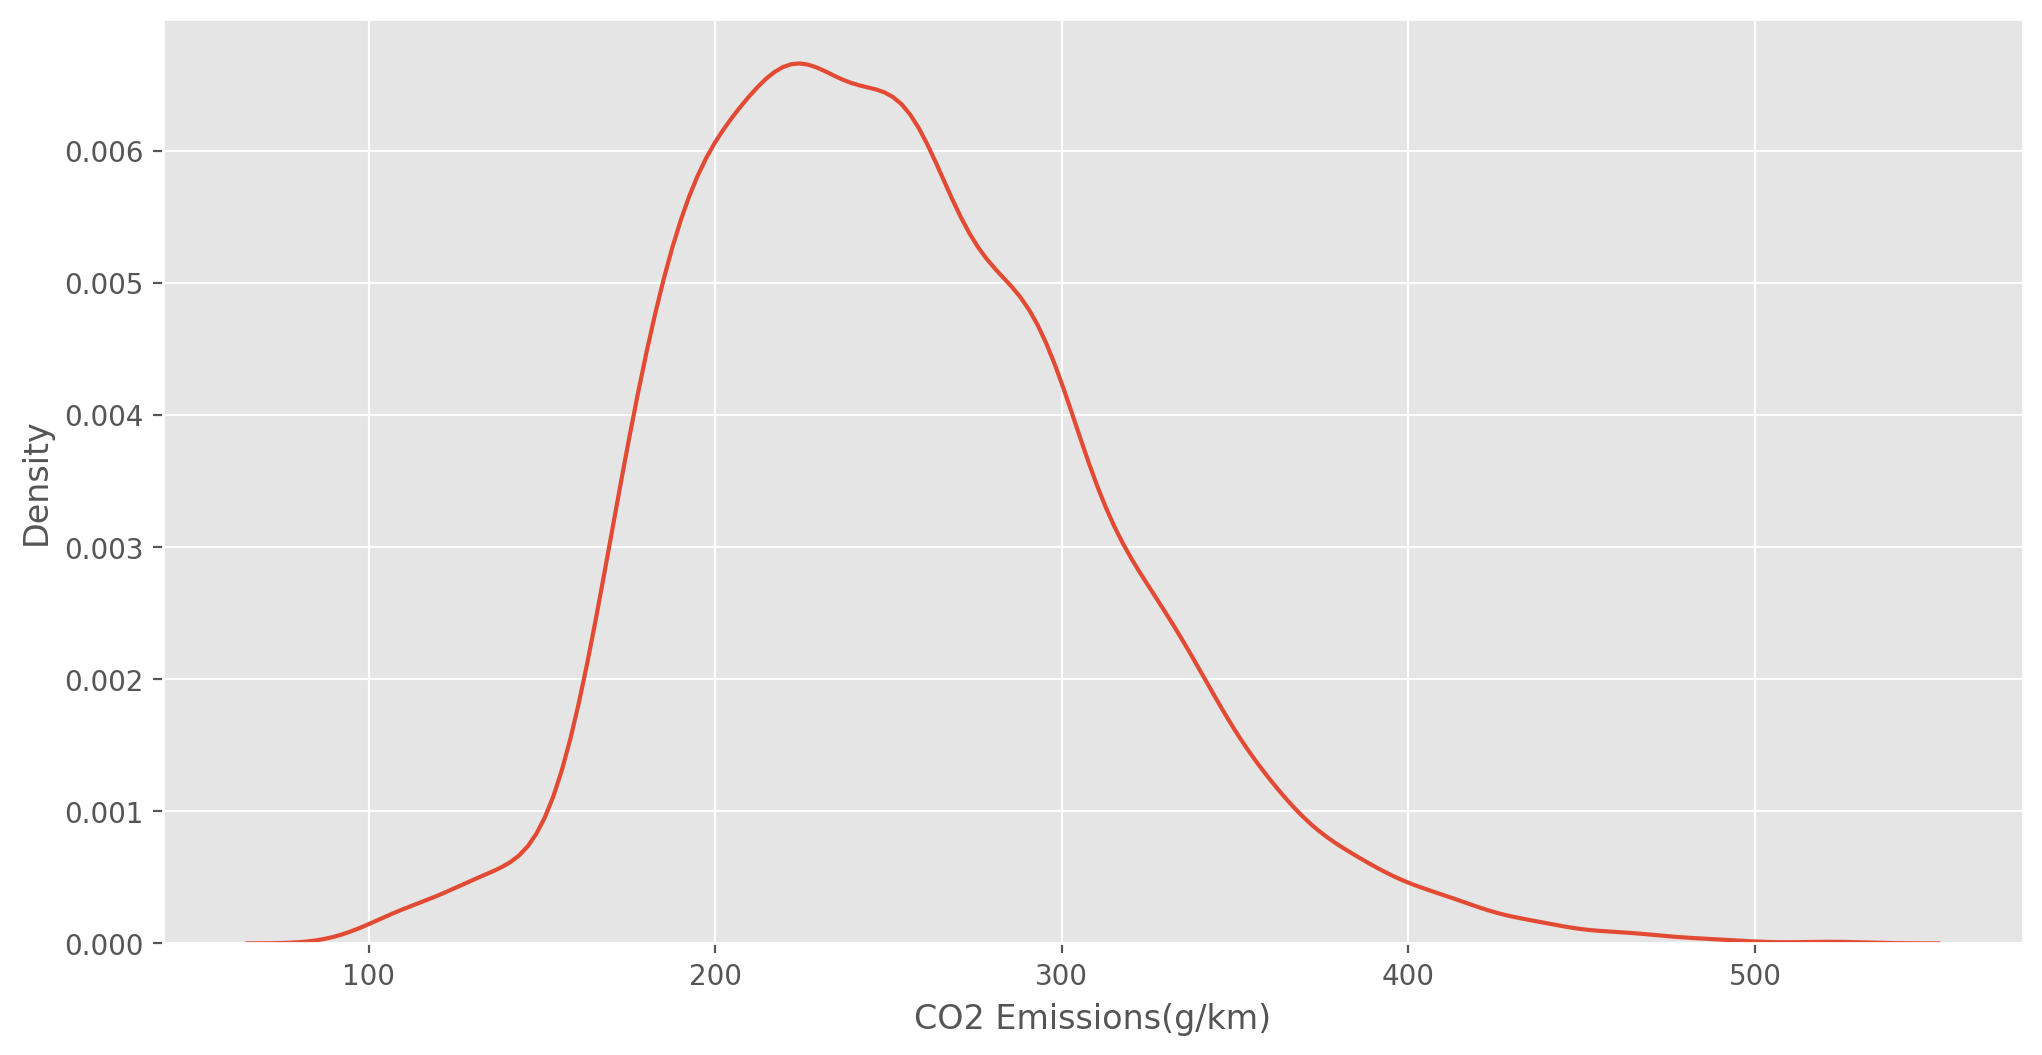

In [14]:
# carbon_emission
plt.figure(figsize = (12,6), dpi = 200)
sns.distplot(data['CO2 Emissions(g/km)'], hist =False )

In [15]:
# Engine Size(L)
data["Engine Size(L)"].value_counts()

2.0    1260
3.0     687
3.6     433
3.5     431
2.5     355
2.4     287
1.6     272
5.3     240
1.8     191
5.0     179
1.5     176
1.4     170
4.0     161
6.2     141
4.4     124
3.8     100
5.7      92
3.7      90
2.7      86
6.0      86
4.7      70
3.3      64
5.5      50
4.3      48
3.4      48
2.3      46
5.2      42
6.4      35
5.6      31
6.6      28
4.8      28
4.6      28
3.2      27
6.7      23
2.8      20
2.9      19
1.2      19
1.0      18
6.5      17
4.2      13
5.4       8
6.8       8
1.3       7
2.1       5
8.4       5
5.9       4
6.3       3
0.9       3
8.0       2
5.8       1
2.2       1
Name: Engine Size(L), dtype: int64

<Axes: xlabel='Engine Size(L)', ylabel='Density'>

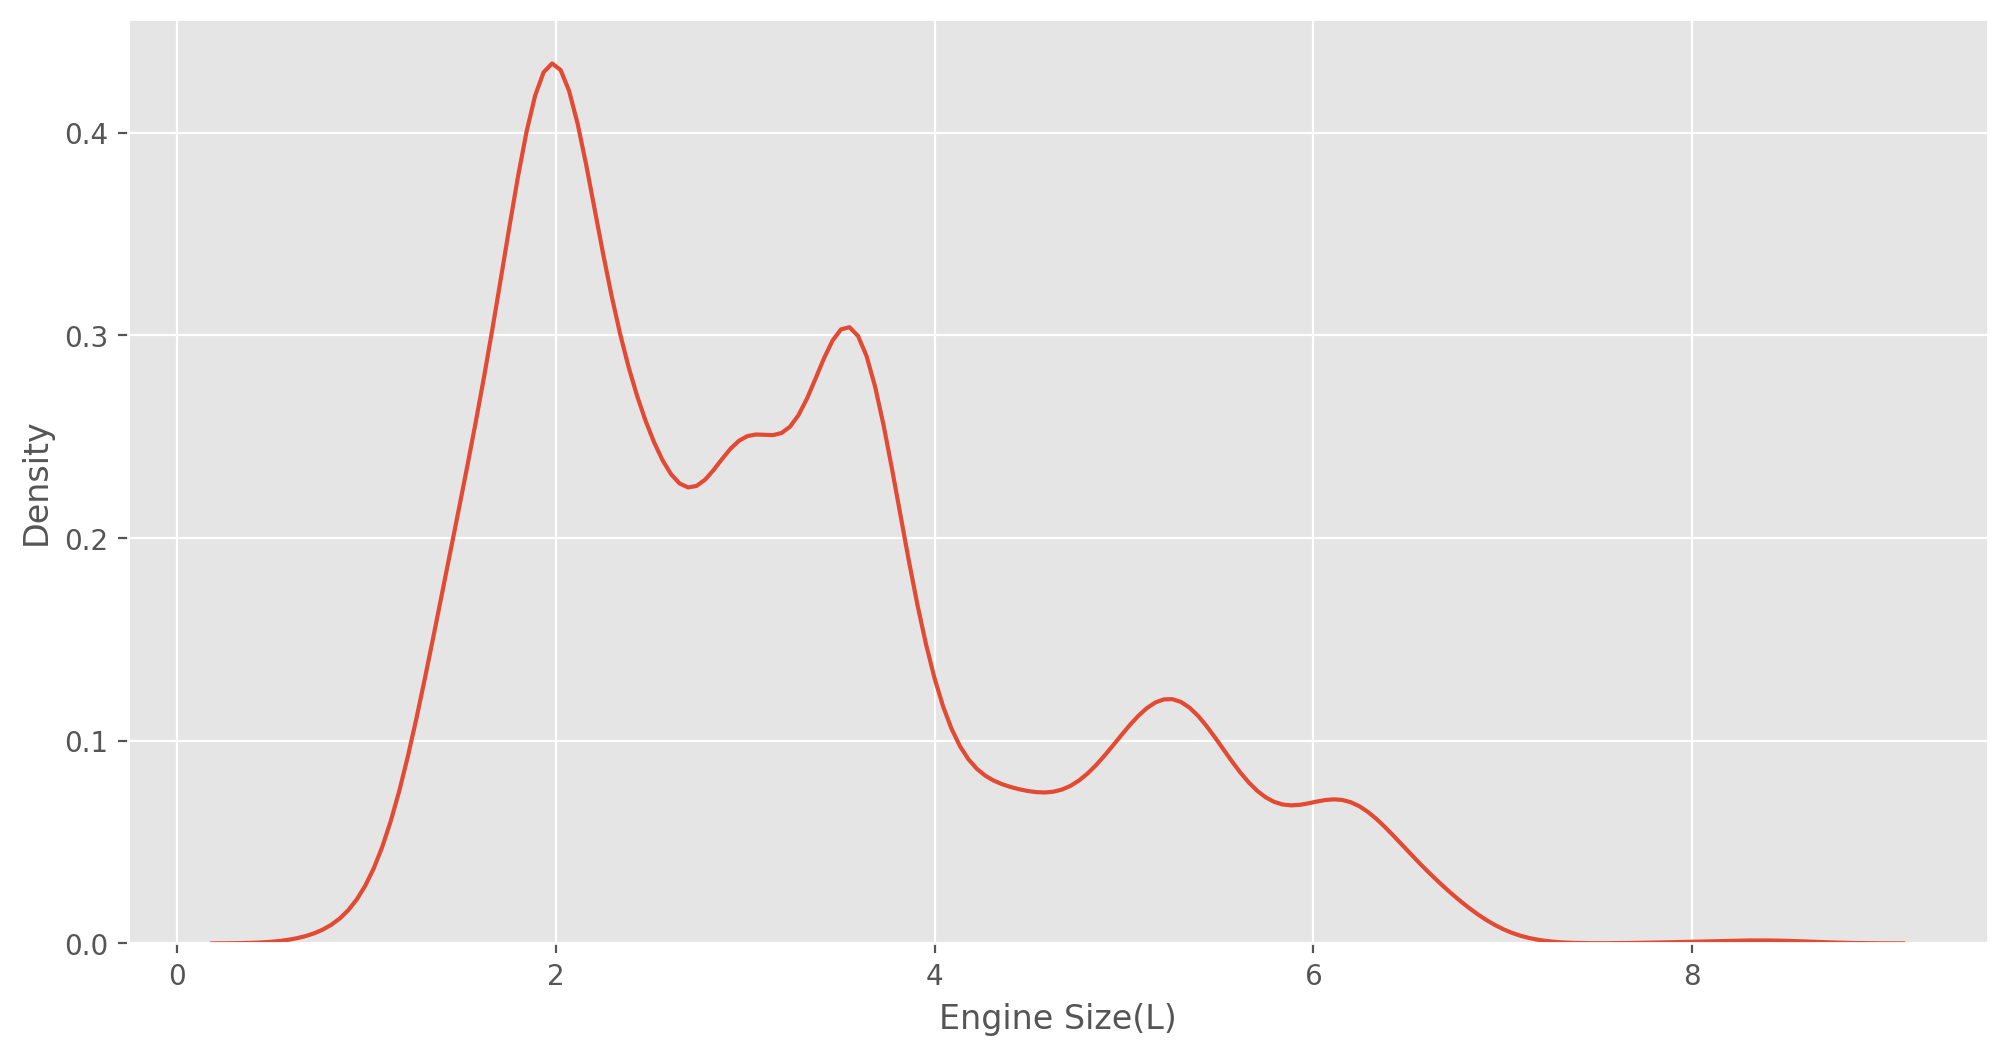

In [16]:
# Engine Size(L)
plt.figure(figsize =(12,6),dpi =200)
sns.distplot(data["Engine Size(L)"], hist= False ) 

- **more people use 2.0 Engine Size.**

<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

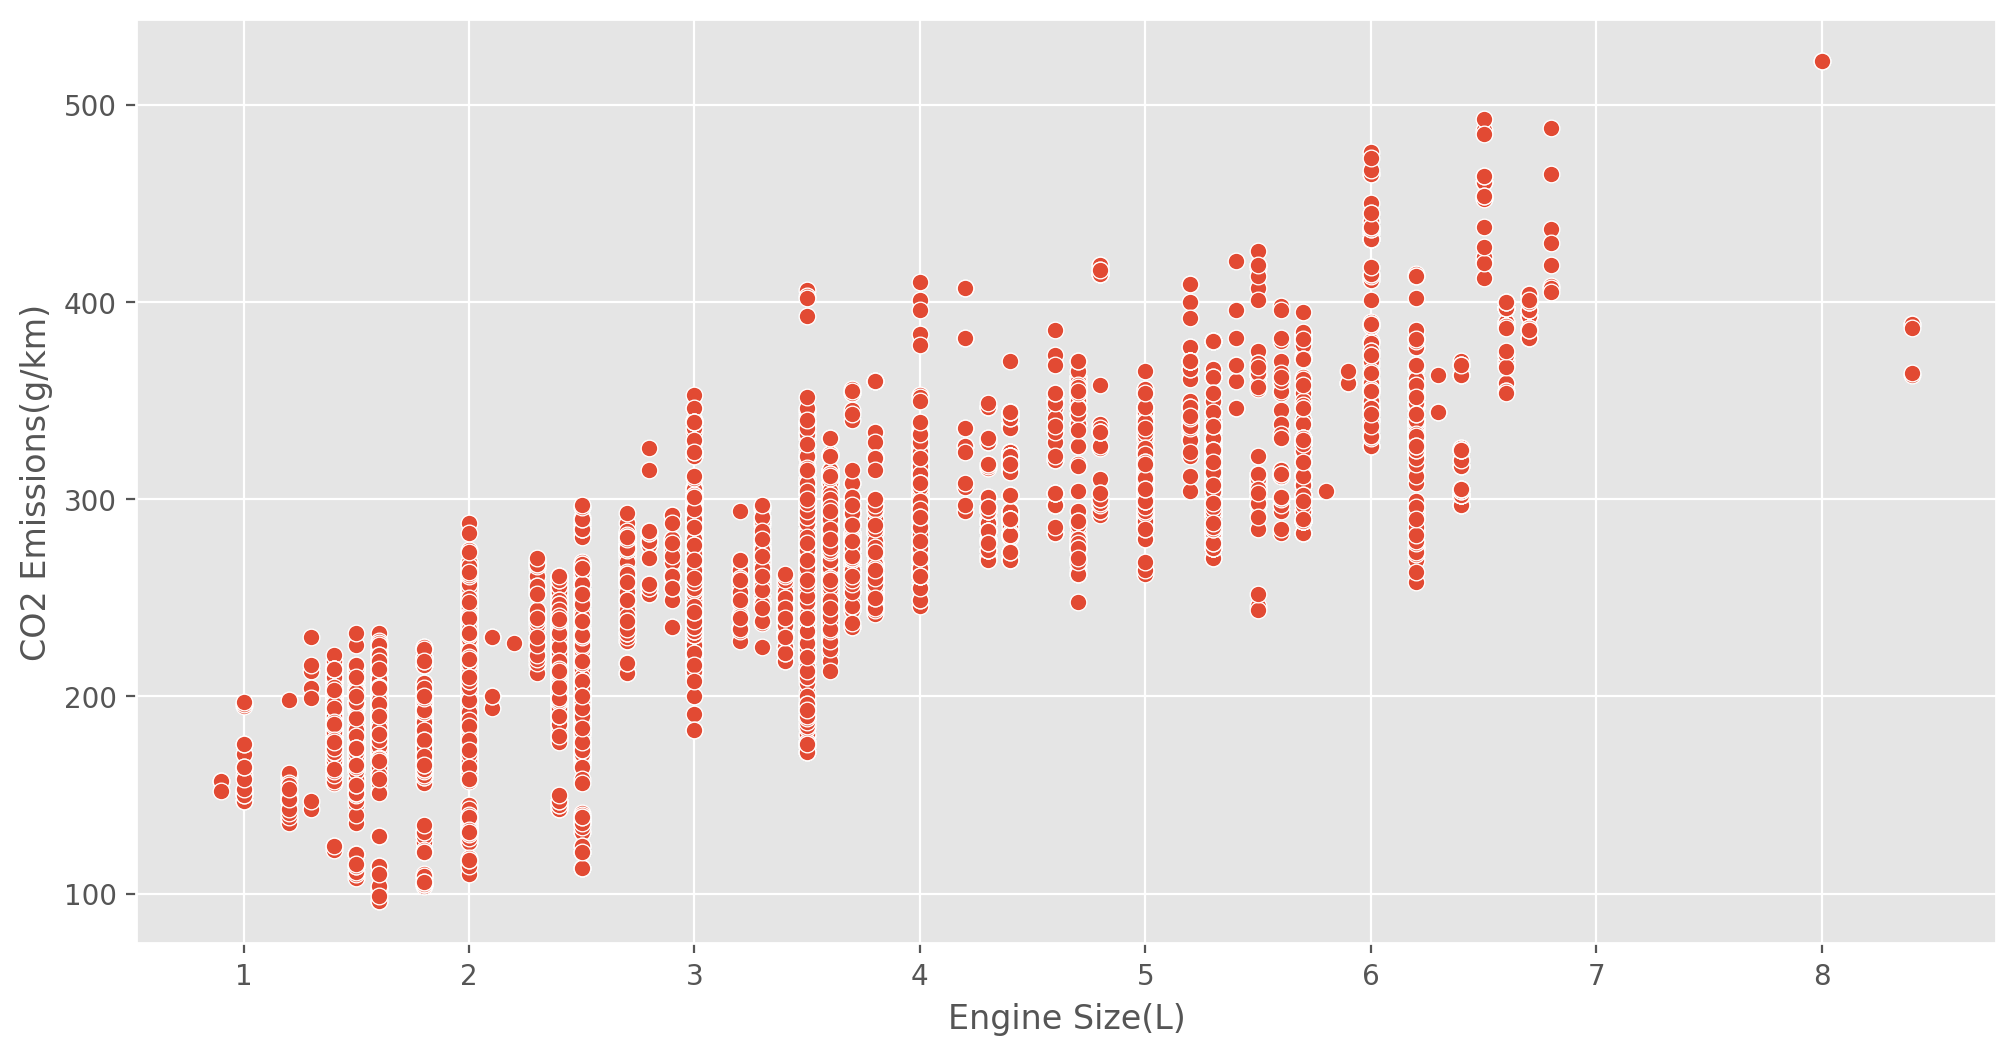

In [17]:
# carbon_emission affected by Enginesize  
plt.figure(figsize =(12,6),dpi =200)
sns.scatterplot(x ="Engine Size(L)",y ="CO2 Emissions(g/km)", data = data ) 

<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

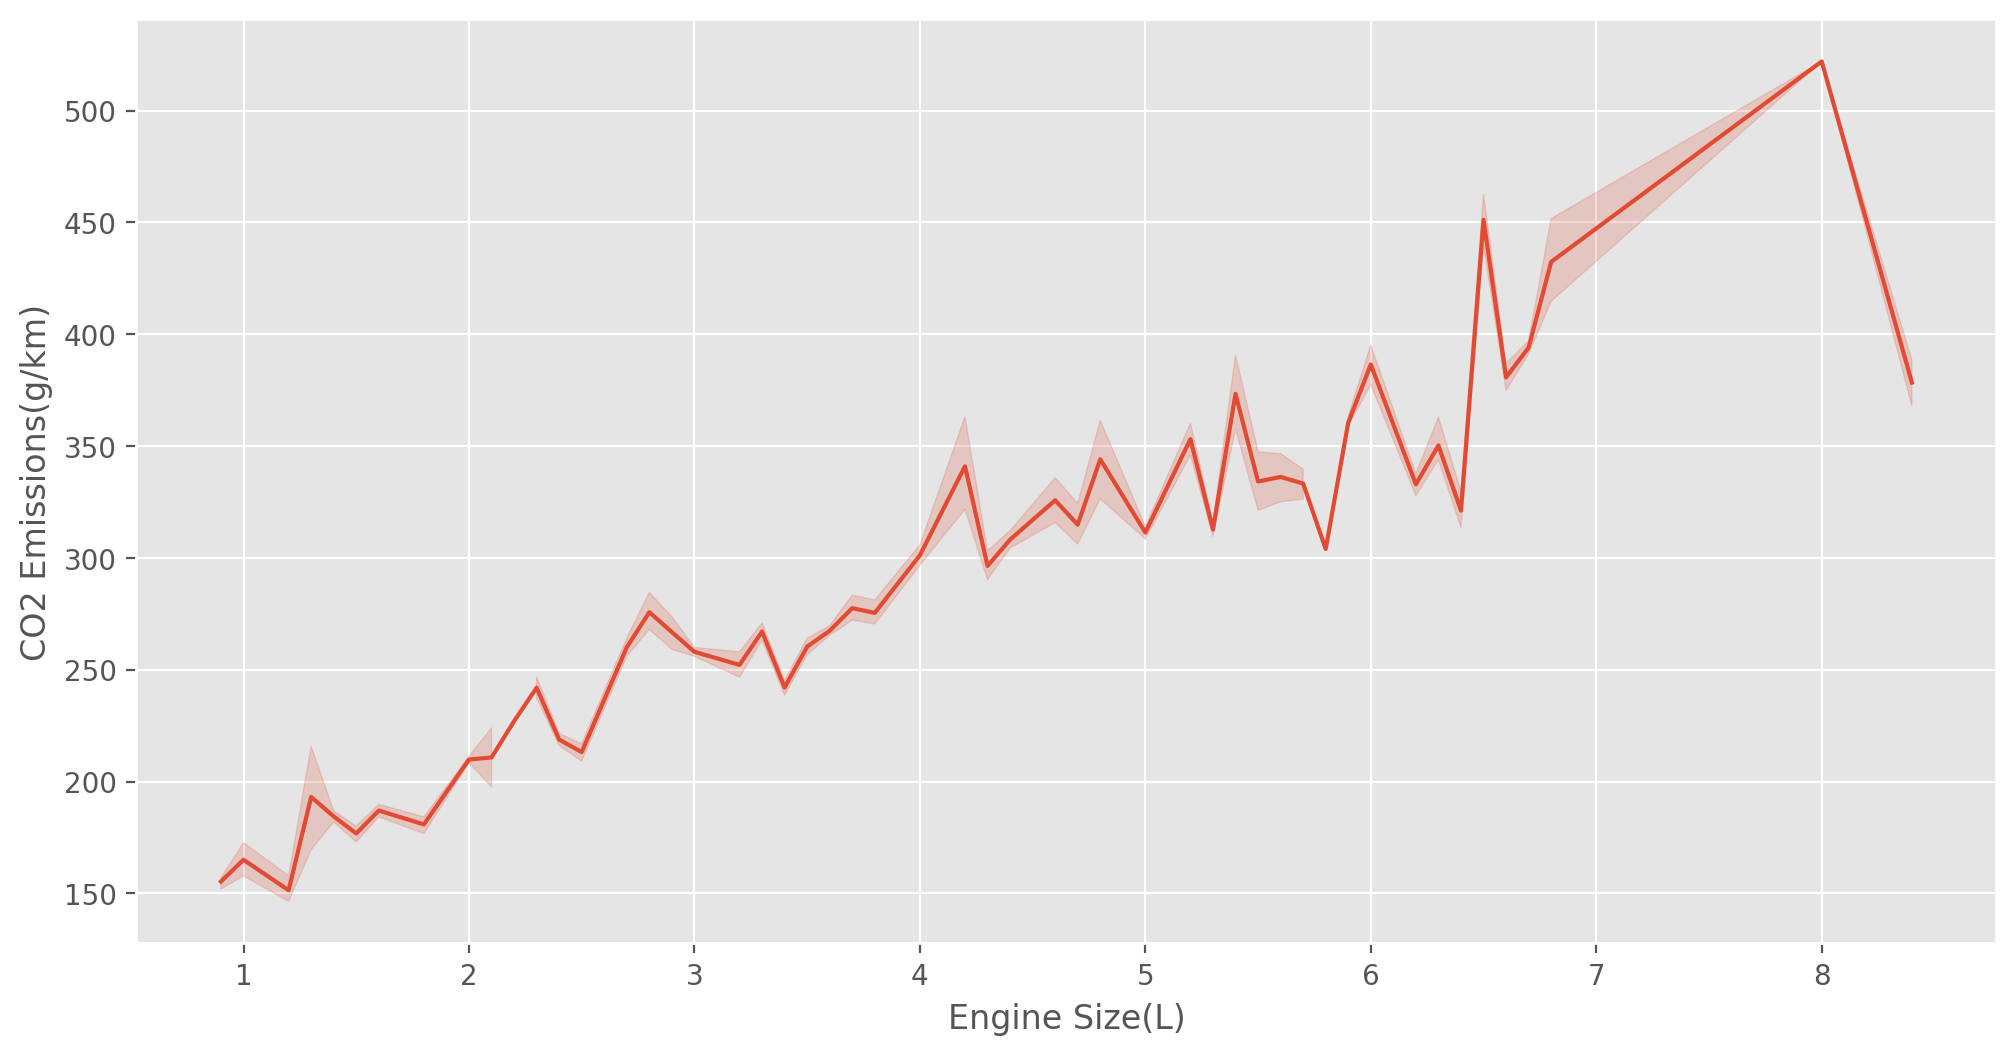

In [18]:
# carbon_emission affected by Enginesize
plt.figure(figsize =(12,6),dpi =200)
sns.lineplot(x ="Engine Size(L)",y ="CO2 Emissions(g/km)", data = data)

- **When Enginesize is bigger then CO2_Emissions will be increses.**

In [19]:
data.Cylinders.value_counts()

4     2749
6     2040
8     1202
12     135
3       88
10      40
5       26
16       2
Name: Cylinders, dtype: int64

<Axes: xlabel='Cylinders', ylabel='count'>

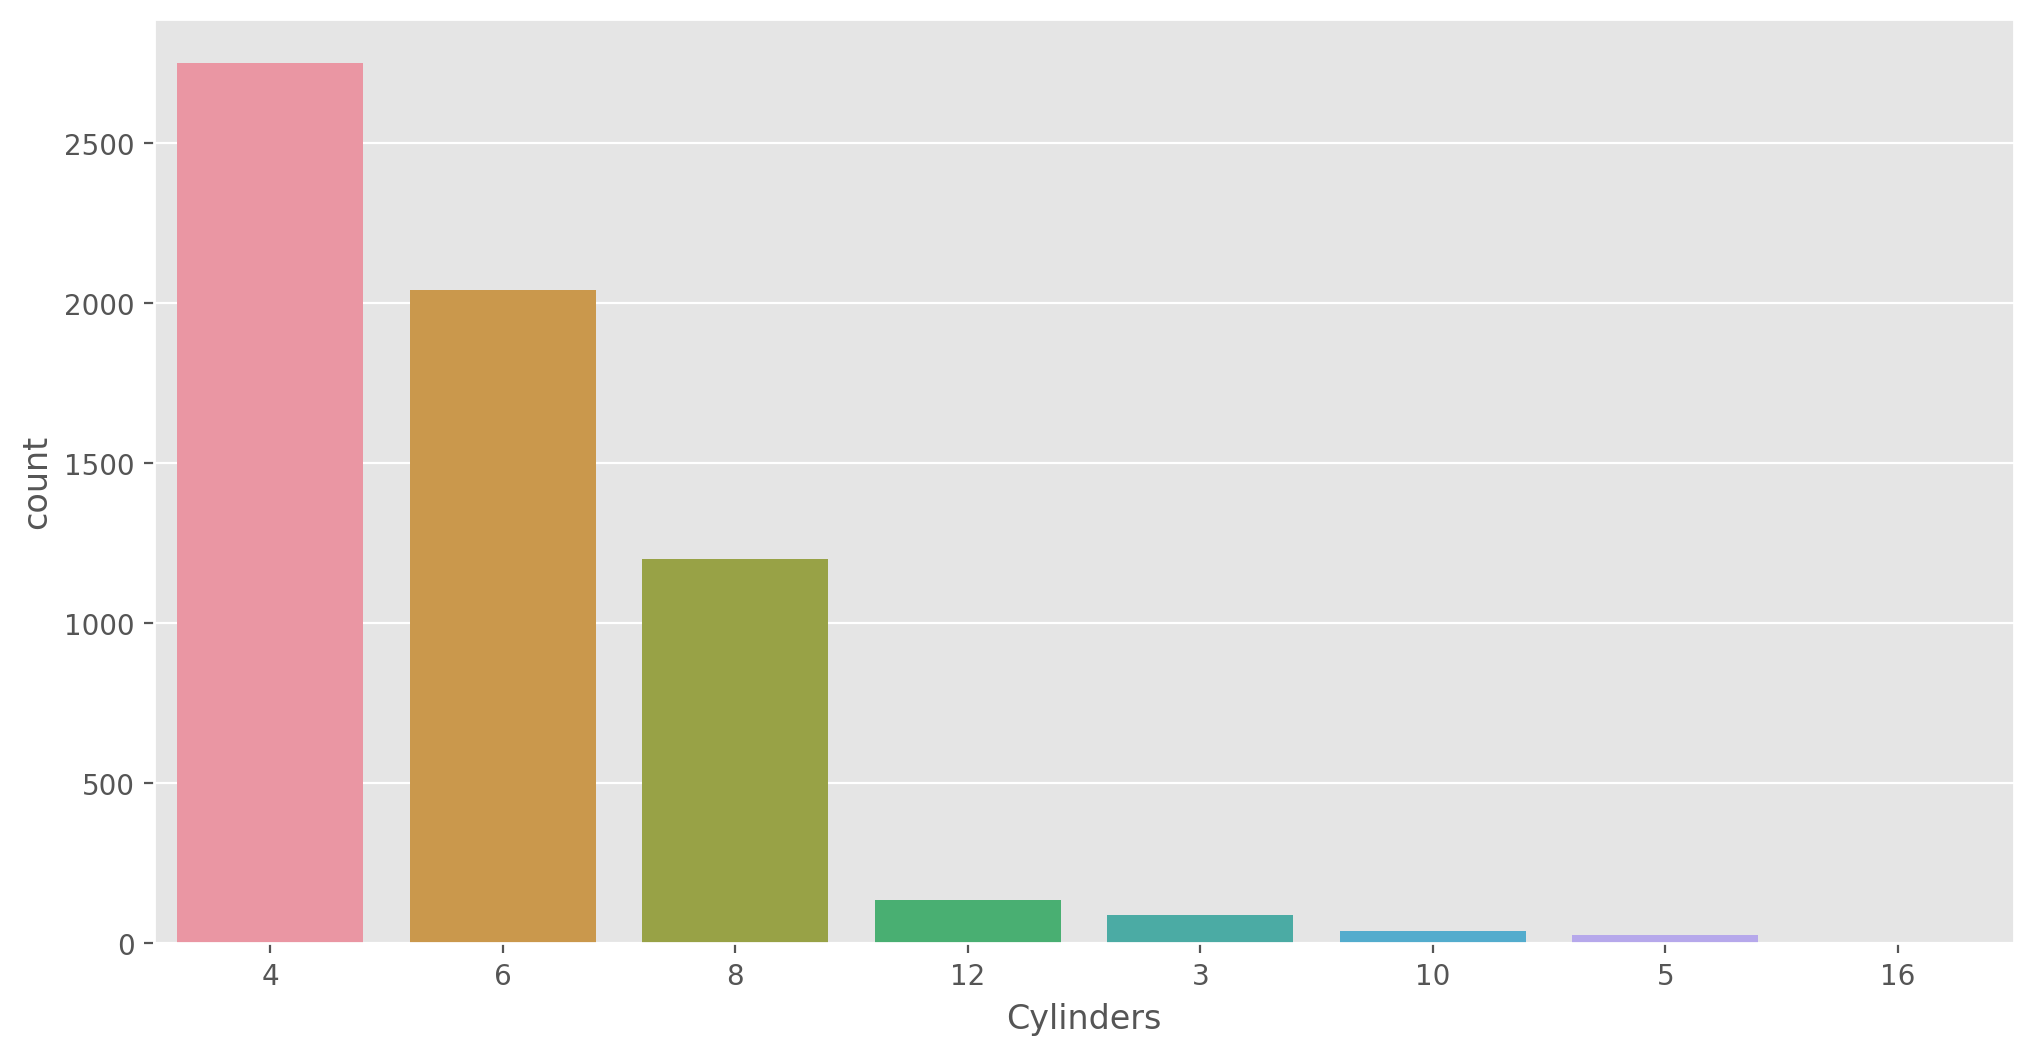

In [20]:
# Cylinders
order_cyli = data.Cylinders.value_counts().index
plt.figure(figsize =(12,6),dpi =200)
sns.countplot(x ="Cylinders", data  =data, order = order_cyli)

- **Cylinder('4') are uses more**
- **Cylinder('16') are uses verry less**

<Axes: xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

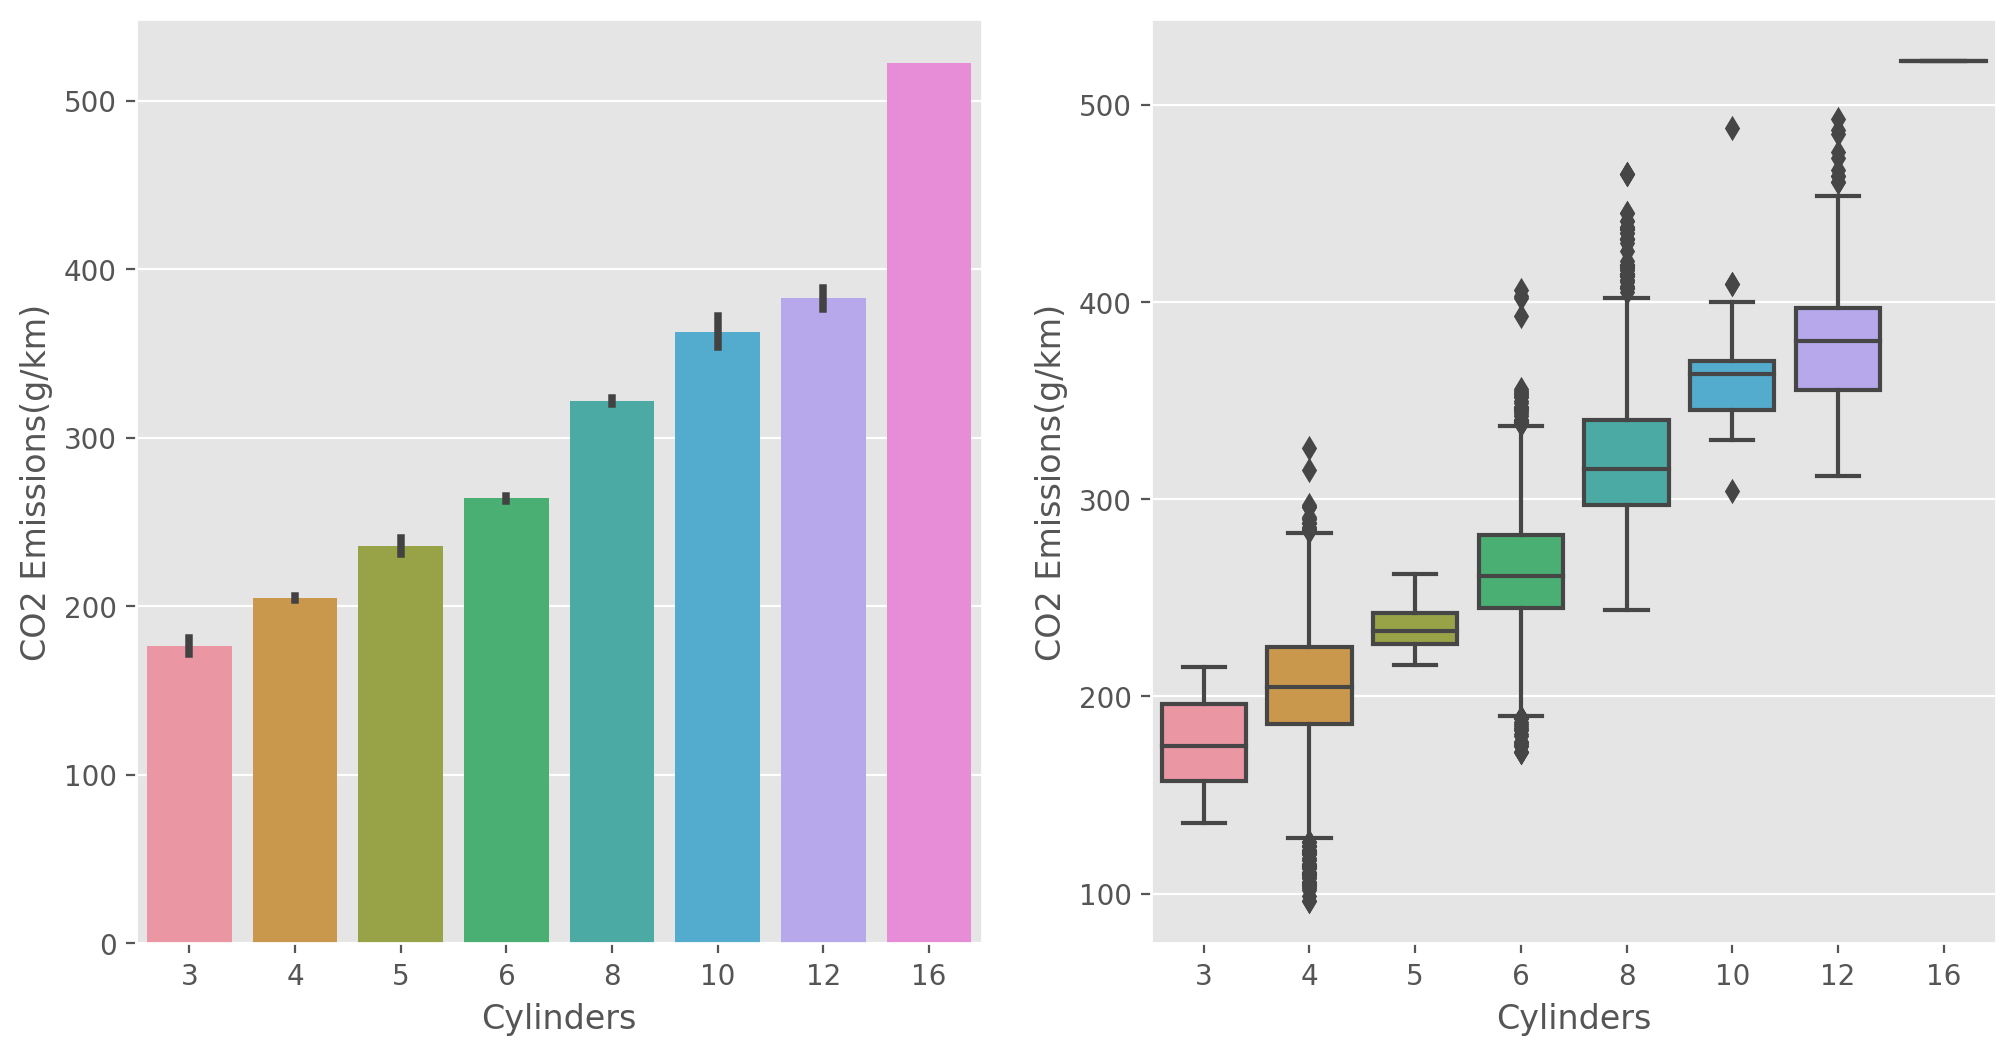

In [21]:
# Cylinders affect the CO2_Emissions
plt.figure(figsize =(12,6),dpi =200)
plt.subplot(1,2,1)
sns.barplot(x ="Cylinders",y ="CO2 Emissions(g/km)",data  =data)
plt.subplot(1,2,2)
sns.boxplot(x ="Cylinders",y ="CO2 Emissions(g/km)",data  =data)

- **when cylinder is increses as well as CO2_Emissions also be increses**

In [22]:
data.groupby(by = 'Cylinders')['CO2 Emissions(g/km)'].mean().sort_values(ascending = False)

Cylinders
16    522.000000
12    382.659259
10    362.600000
8     321.912646
6     263.972059
5     235.692308
4     204.963623
3     176.715909
Name: CO2 Emissions(g/km), dtype: float64

<Axes: xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

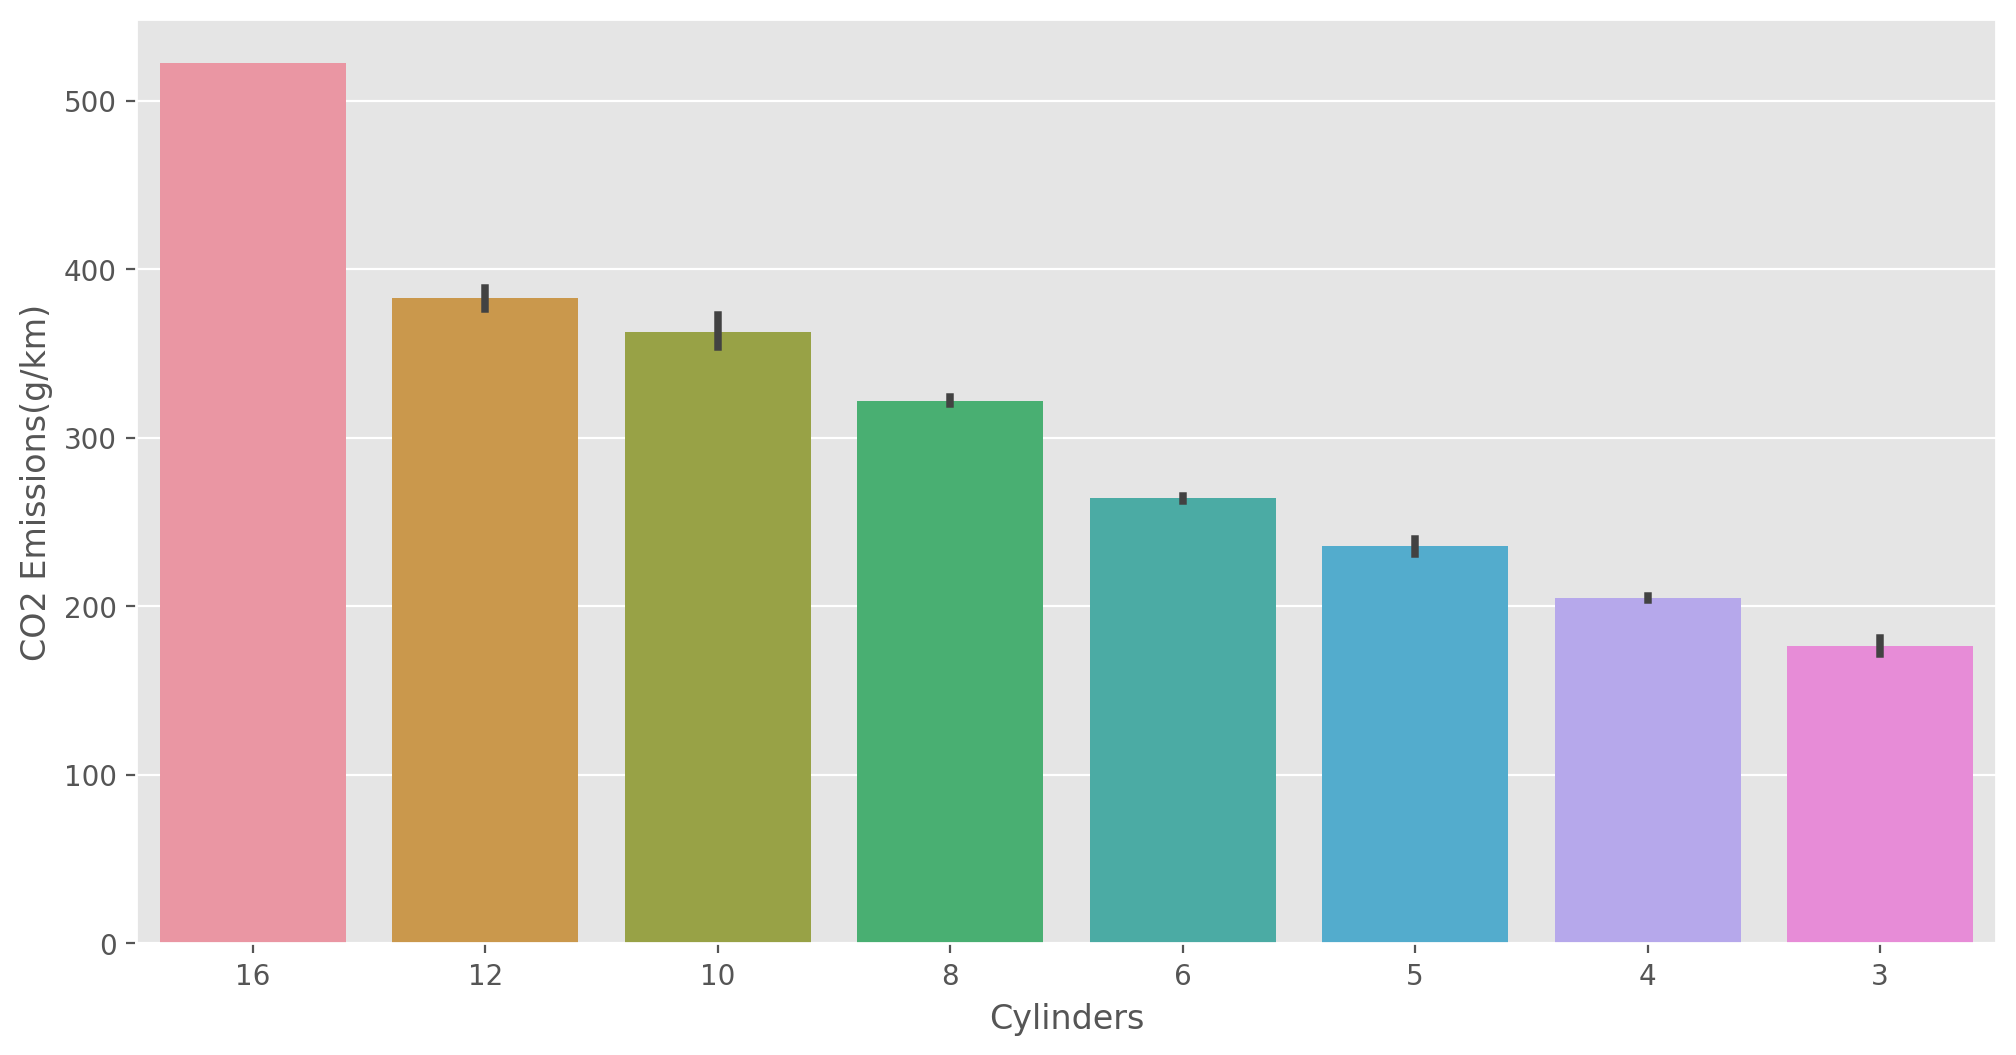

In [23]:
desc_oredr = data.groupby(by = 'Cylinders')['CO2 Emissions(g/km)'].mean().sort_values(ascending = False).index
plt.figure(figsize =(12,6),dpi =200)
sns.barplot(x ="Cylinders",y ="CO2 Emissions(g/km)",data  =data,order =desc_oredr)

In [24]:
data['Vehicle Class'].value_counts()

SUV - SMALL                 1006
MID-SIZE                     983
COMPACT                      903
SUV - STANDARD               613
SUBCOMPACT                   533
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      475
TWO-SEATER                   381
MINICOMPACT                  274
STATION WAGON - SMALL        214
PICKUP TRUCK - SMALL         133
VAN - PASSENGER               66
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: Vehicle Class, dtype: int64

<Axes: xlabel='count', ylabel='Vehicle Class'>

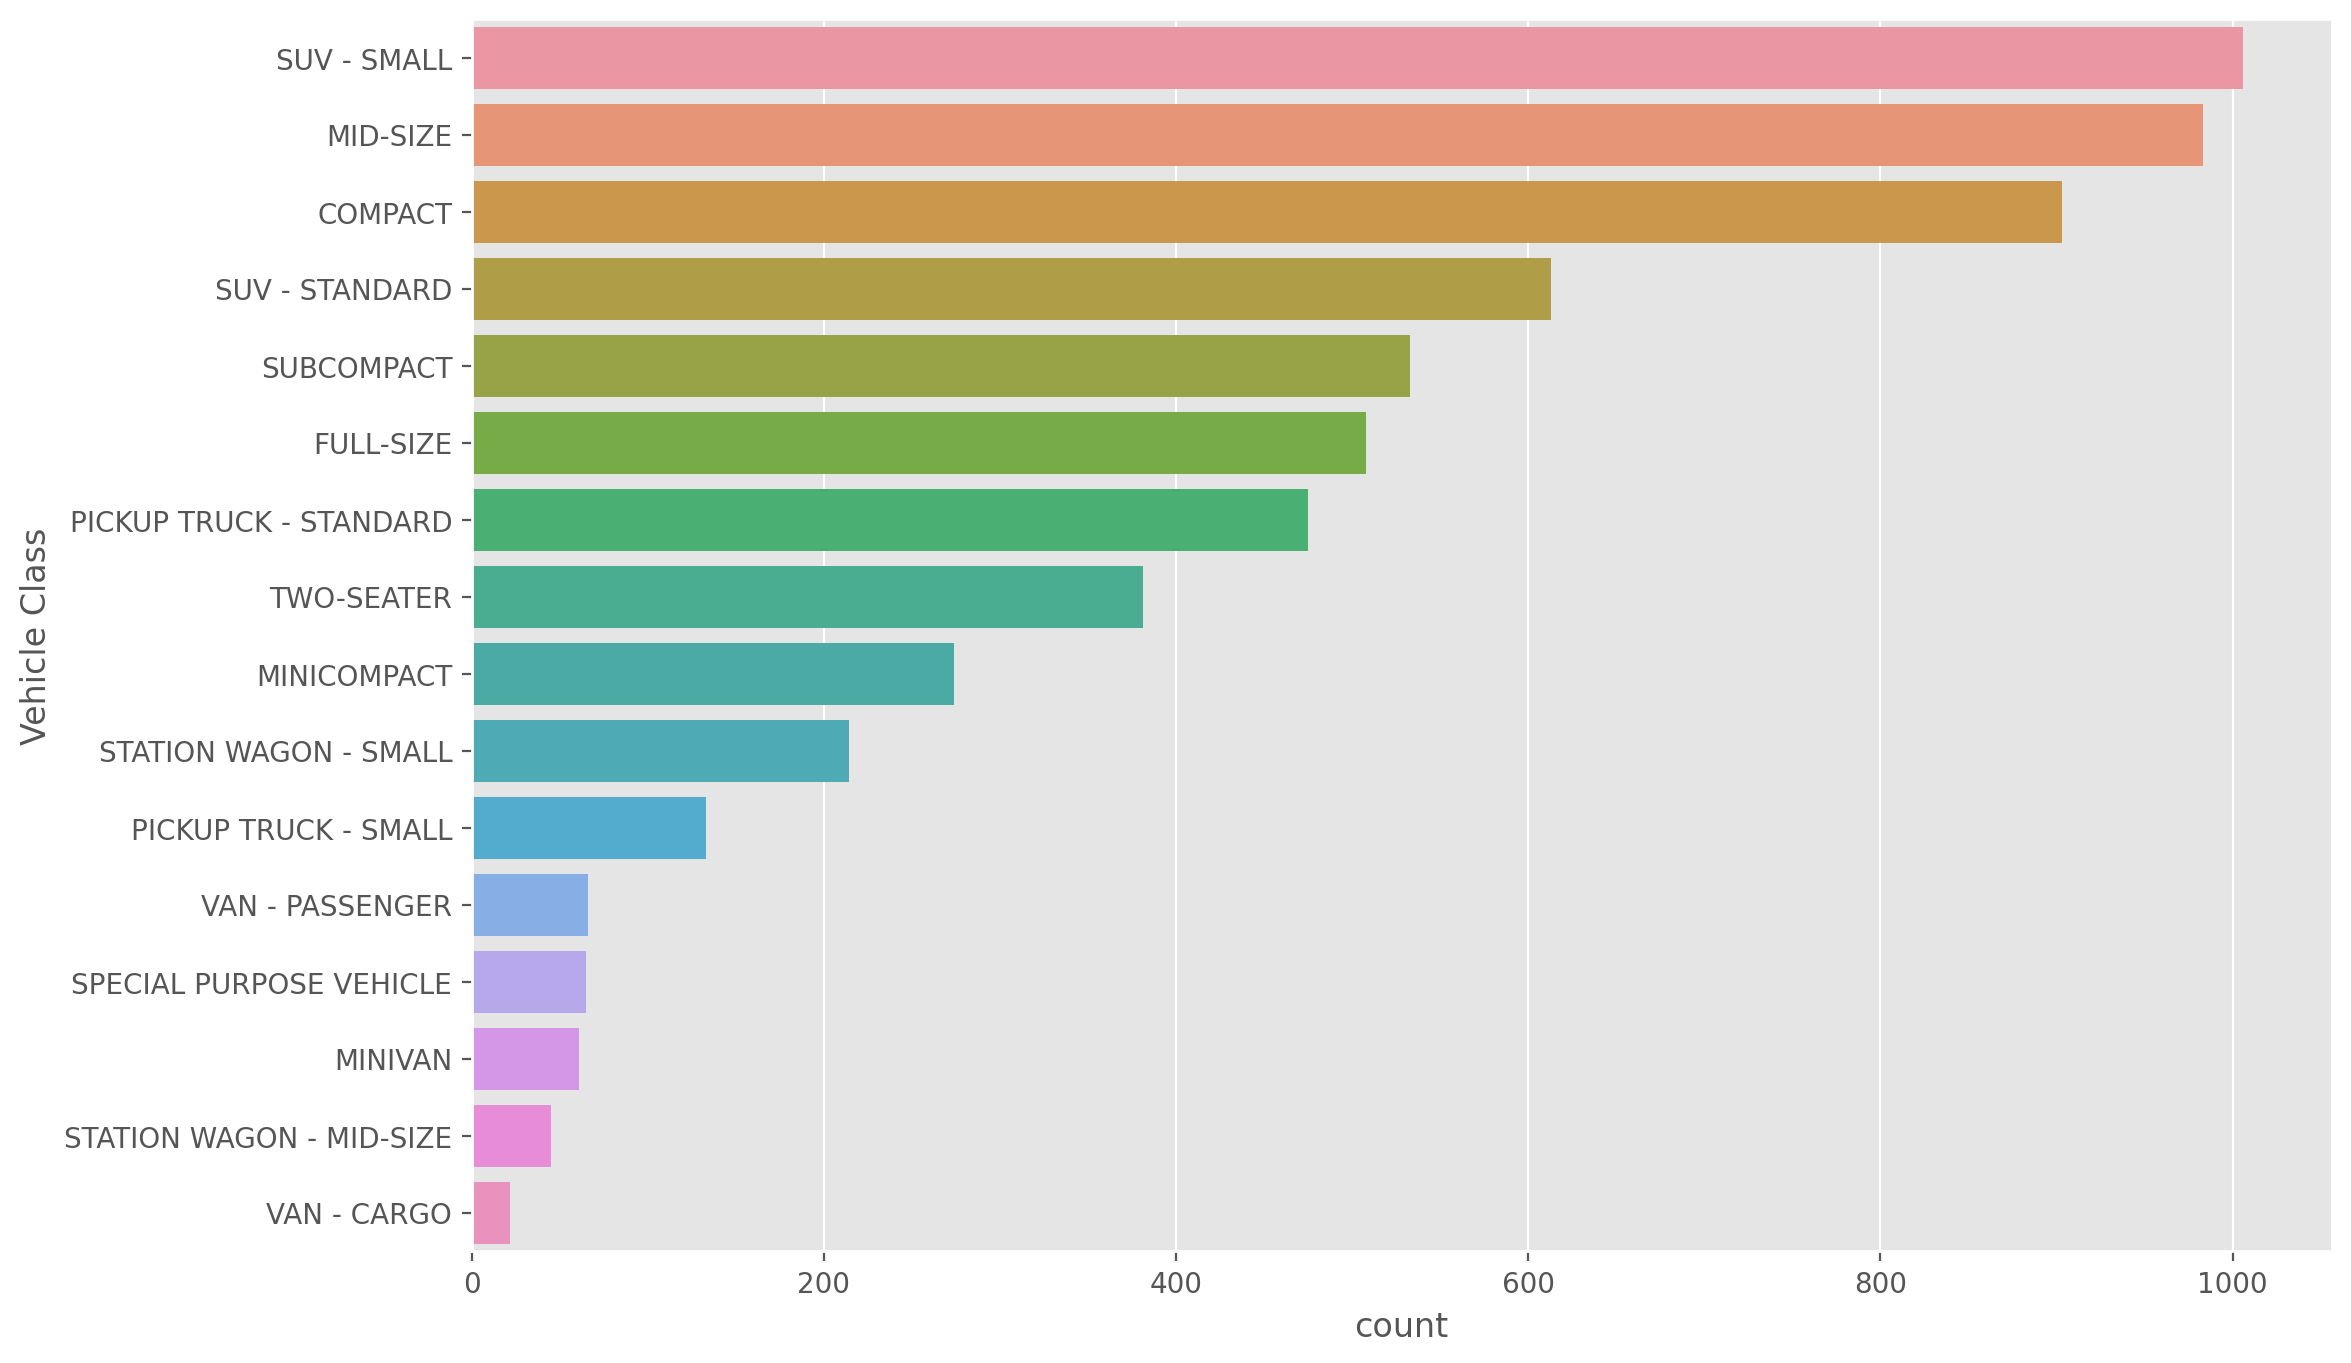

In [25]:
# Vehicle Class
order_vehi = data['Vehicle Class'].value_counts().index
plt.figure(figsize =(12,8),dpi =200)
sns.countplot(y ="Vehicle Class",data  =data, order = order_vehi)

- **SUV - SMALL-Vehicle is  more purches**

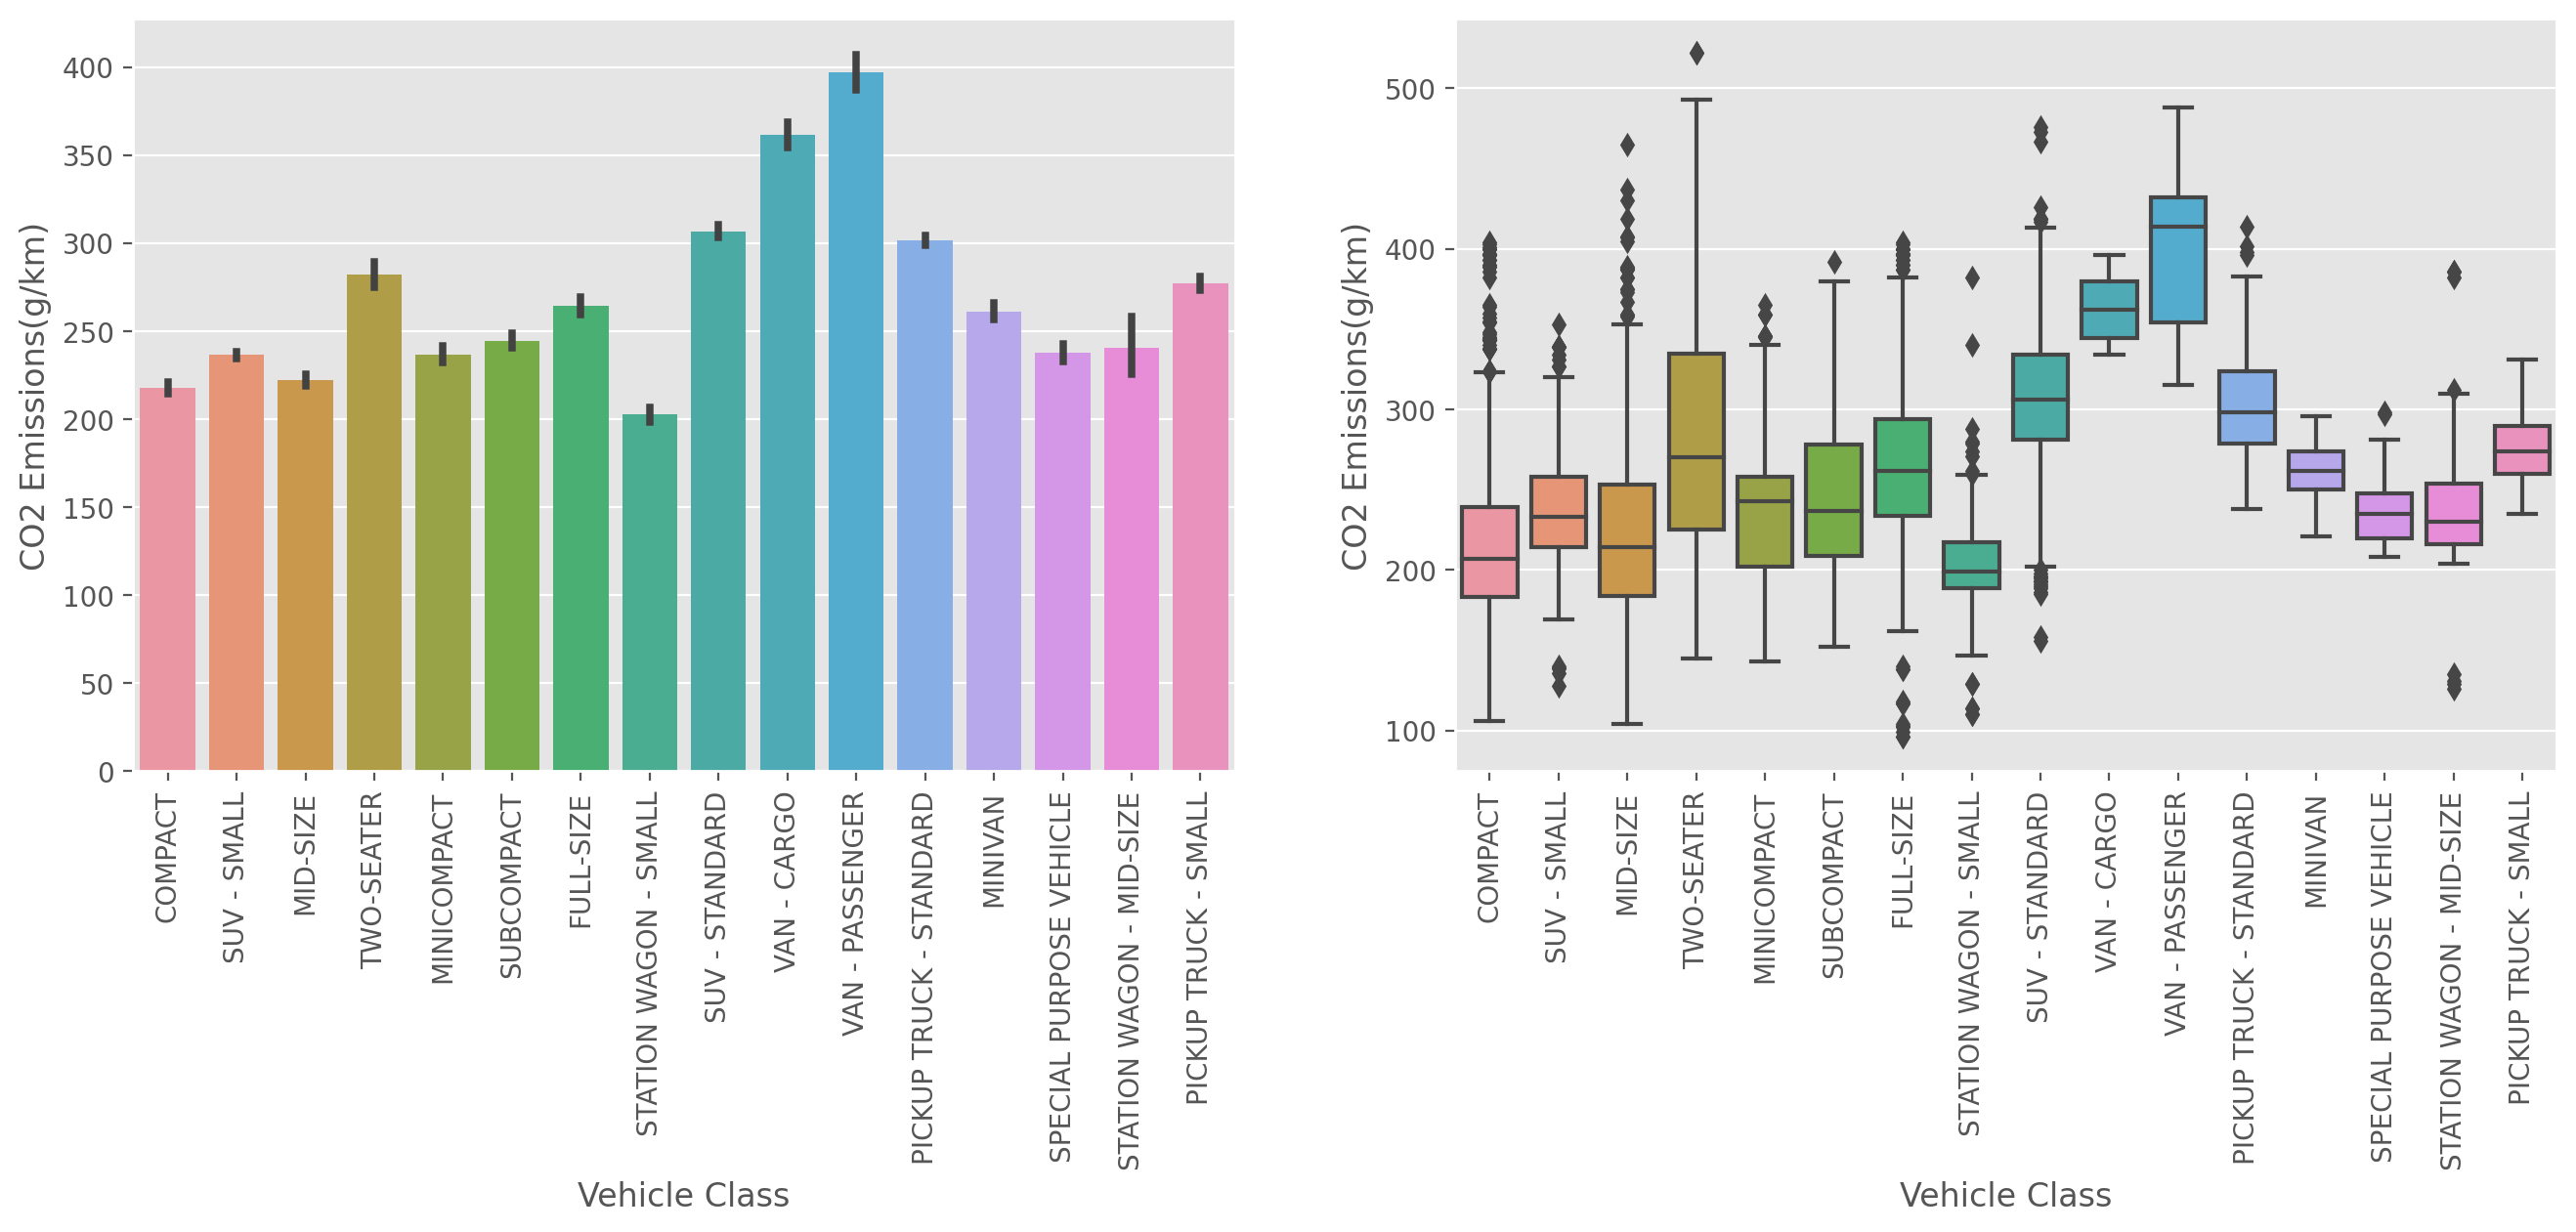

In [26]:
# CO2 Emissions Affected by Vehicle class
plt.figure(figsize =(16,5),dpi =200)
plt.subplot(1,2,1)
sns.barplot(x ="Vehicle Class",y ="CO2 Emissions(g/km)",data  =data)
plt.xticks(rotation =90)
plt.subplot(1,2,2)
sns.boxplot(x ="Vehicle Class",y ="CO2 Emissions(g/km)",data  =data)
plt.xticks(rotation =90)

plt.show()

In [27]:
data.groupby(by = 'Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values(ascending = False)

Vehicle Class
VAN - PASSENGER             397.212121
VAN - CARGO                 361.500000
SUV - STANDARD              306.730832
PICKUP TRUCK - STANDARD     301.610526
TWO-SEATER                  282.086614
PICKUP TRUCK - SMALL        277.022556
FULL-SIZE                   264.407480
MINIVAN                     261.114754
SUBCOMPACT                  244.568480
STATION WAGON - MID-SIZE    240.755556
SPECIAL PURPOSE VEHICLE     237.815385
MINICOMPACT                 236.675182
SUV - SMALL                 236.413519
MID-SIZE                    222.292981
COMPACT                     217.641196
STATION WAGON - SMALL       202.686916
Name: CO2 Emissions(g/km), dtype: float64

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Vehicle Class'>

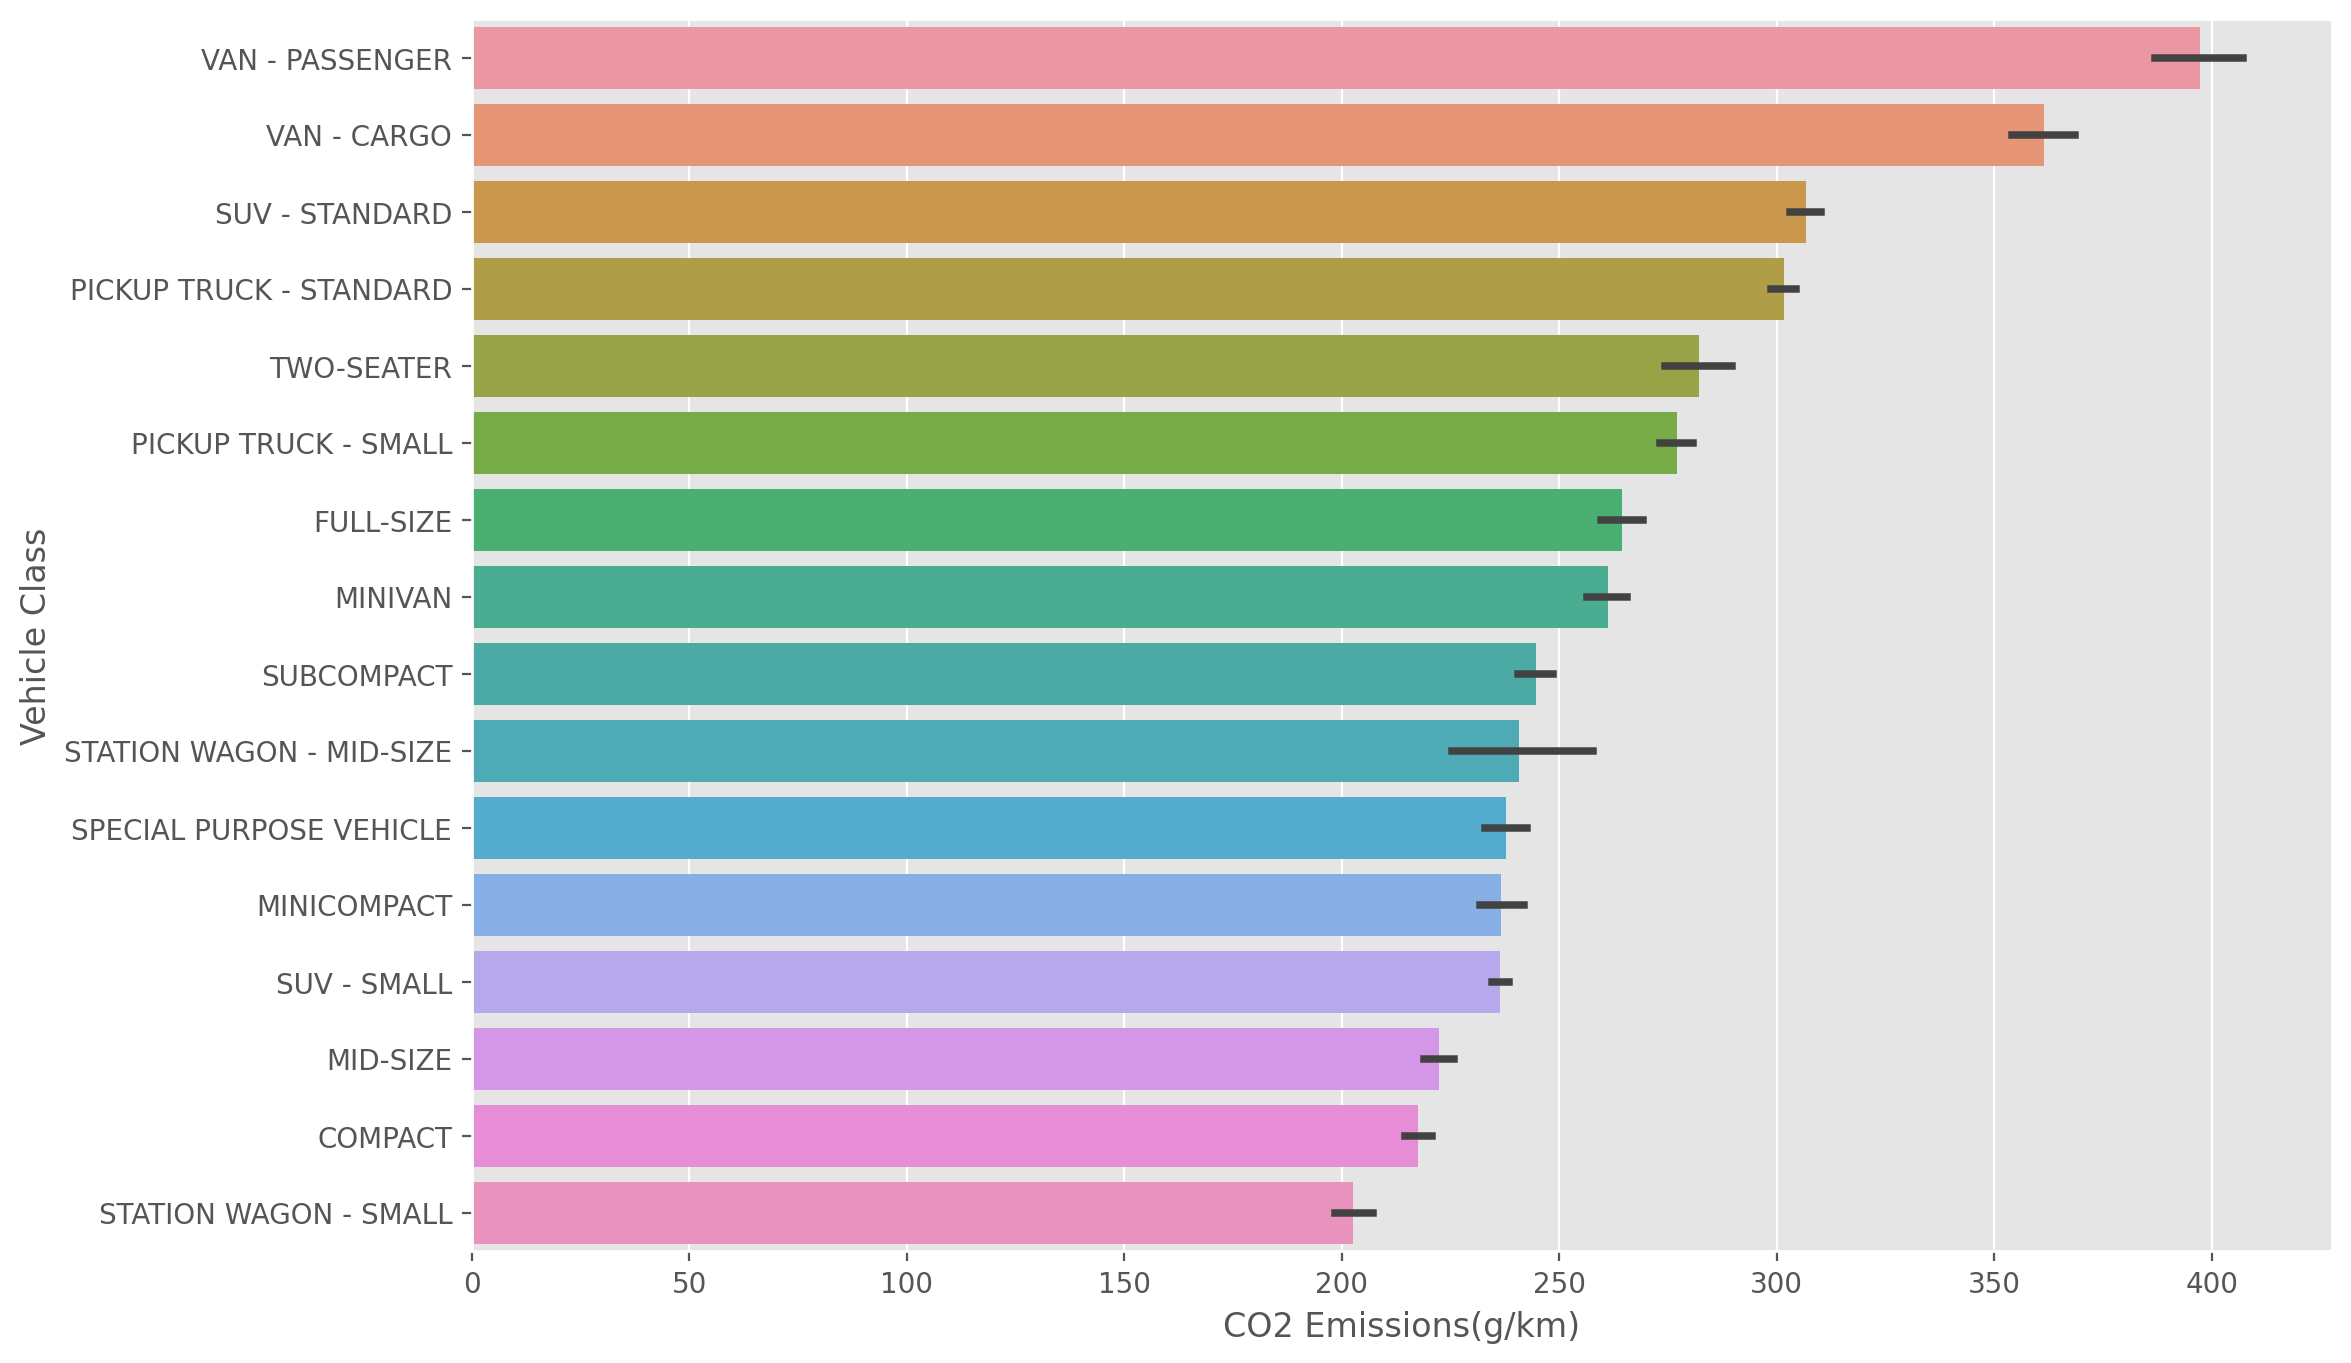

In [28]:
desc_oredr = data.groupby(by ='Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values(ascending = False).index
plt.figure(figsize =(12,8),dpi =200)
sns.barplot(x ="CO2 Emissions(g/km)",y ="Vehicle Class",data =data, order =desc_oredr)

- **In case VAN - PASSENGER  are produce more CO2 Emissions**

In [29]:
data['Fuel Type'].value_counts()

X    3039
Z    2765
E     330
D     147
N       1
Name: Fuel Type, dtype: int64

<Axes: xlabel='Fuel Type', ylabel='count'>

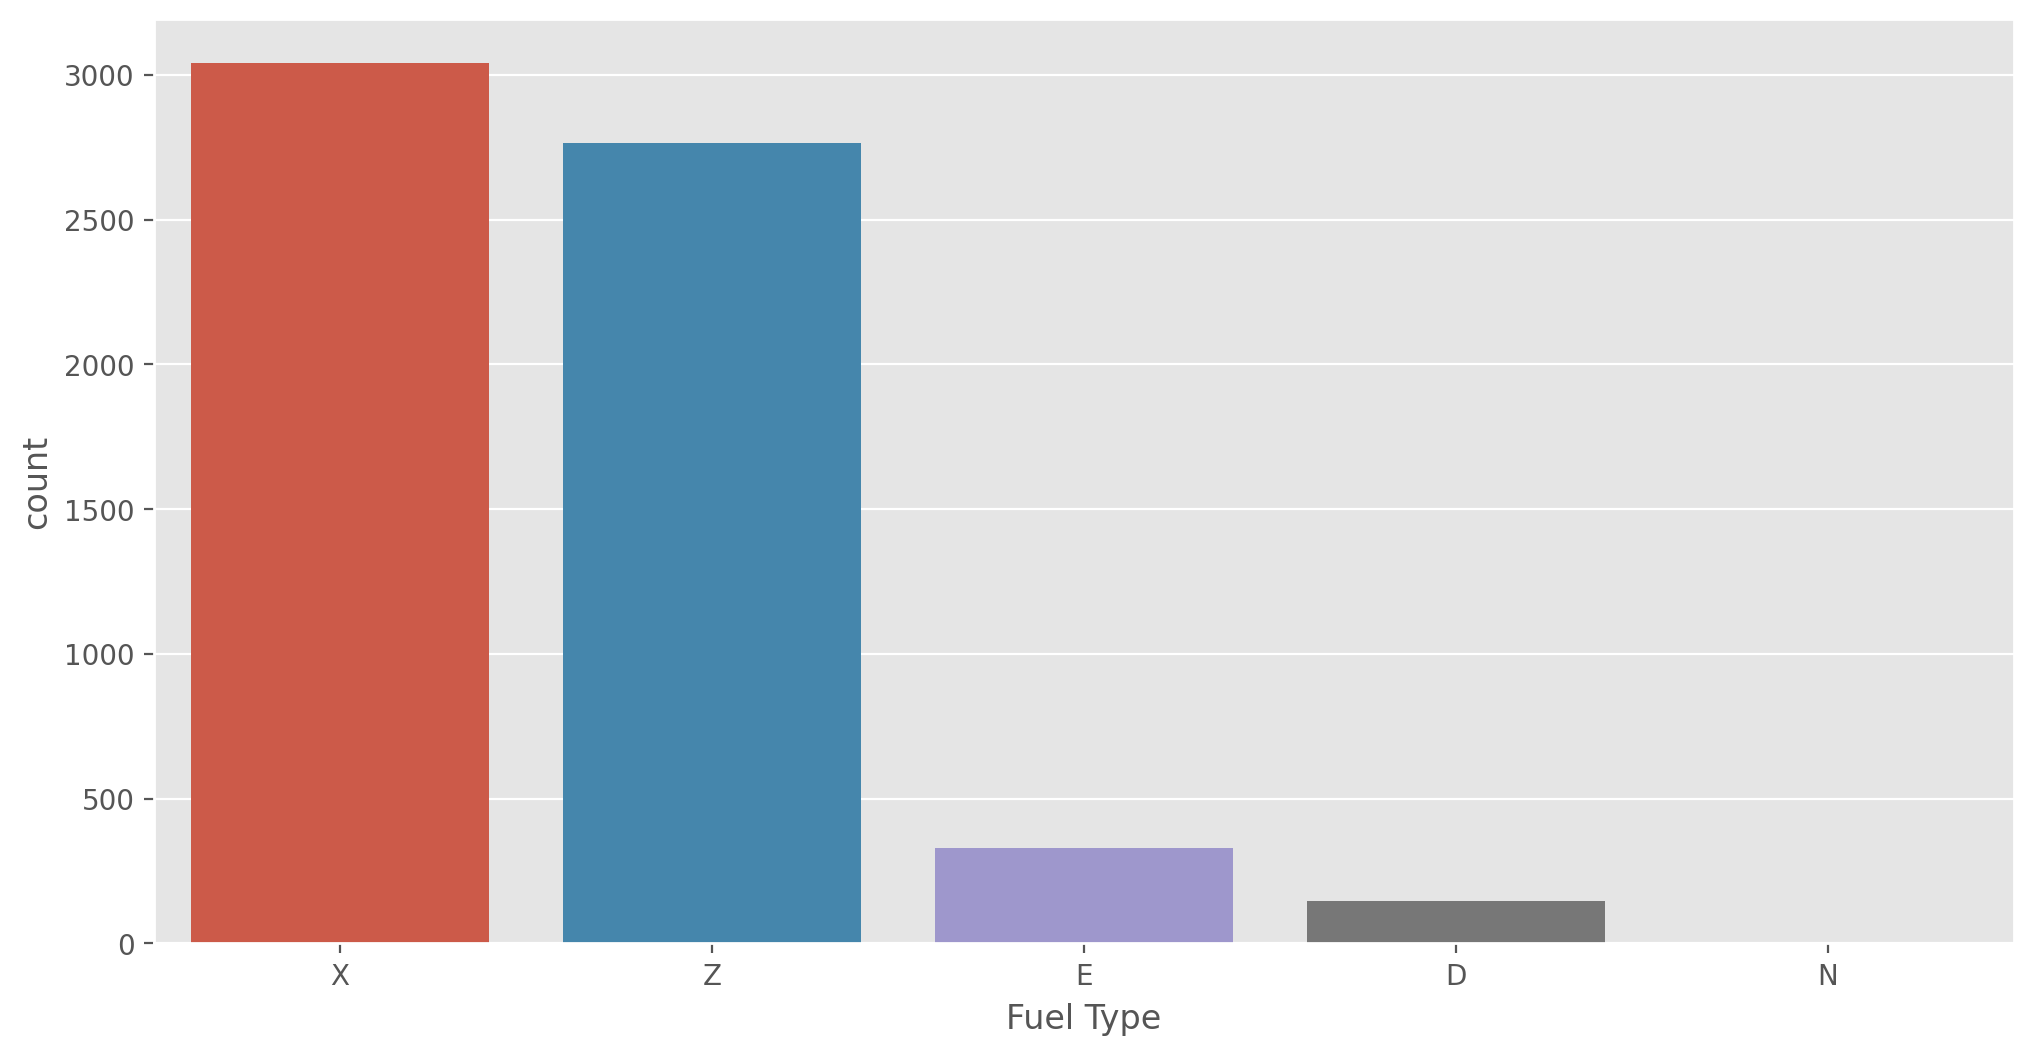

In [30]:
# Fuel Type
order_fuel = data['Fuel Type'].value_counts().index
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot(x = "Fuel Type" , data = data, order = order_fuel)

- **Fuel type('X') is more purches**

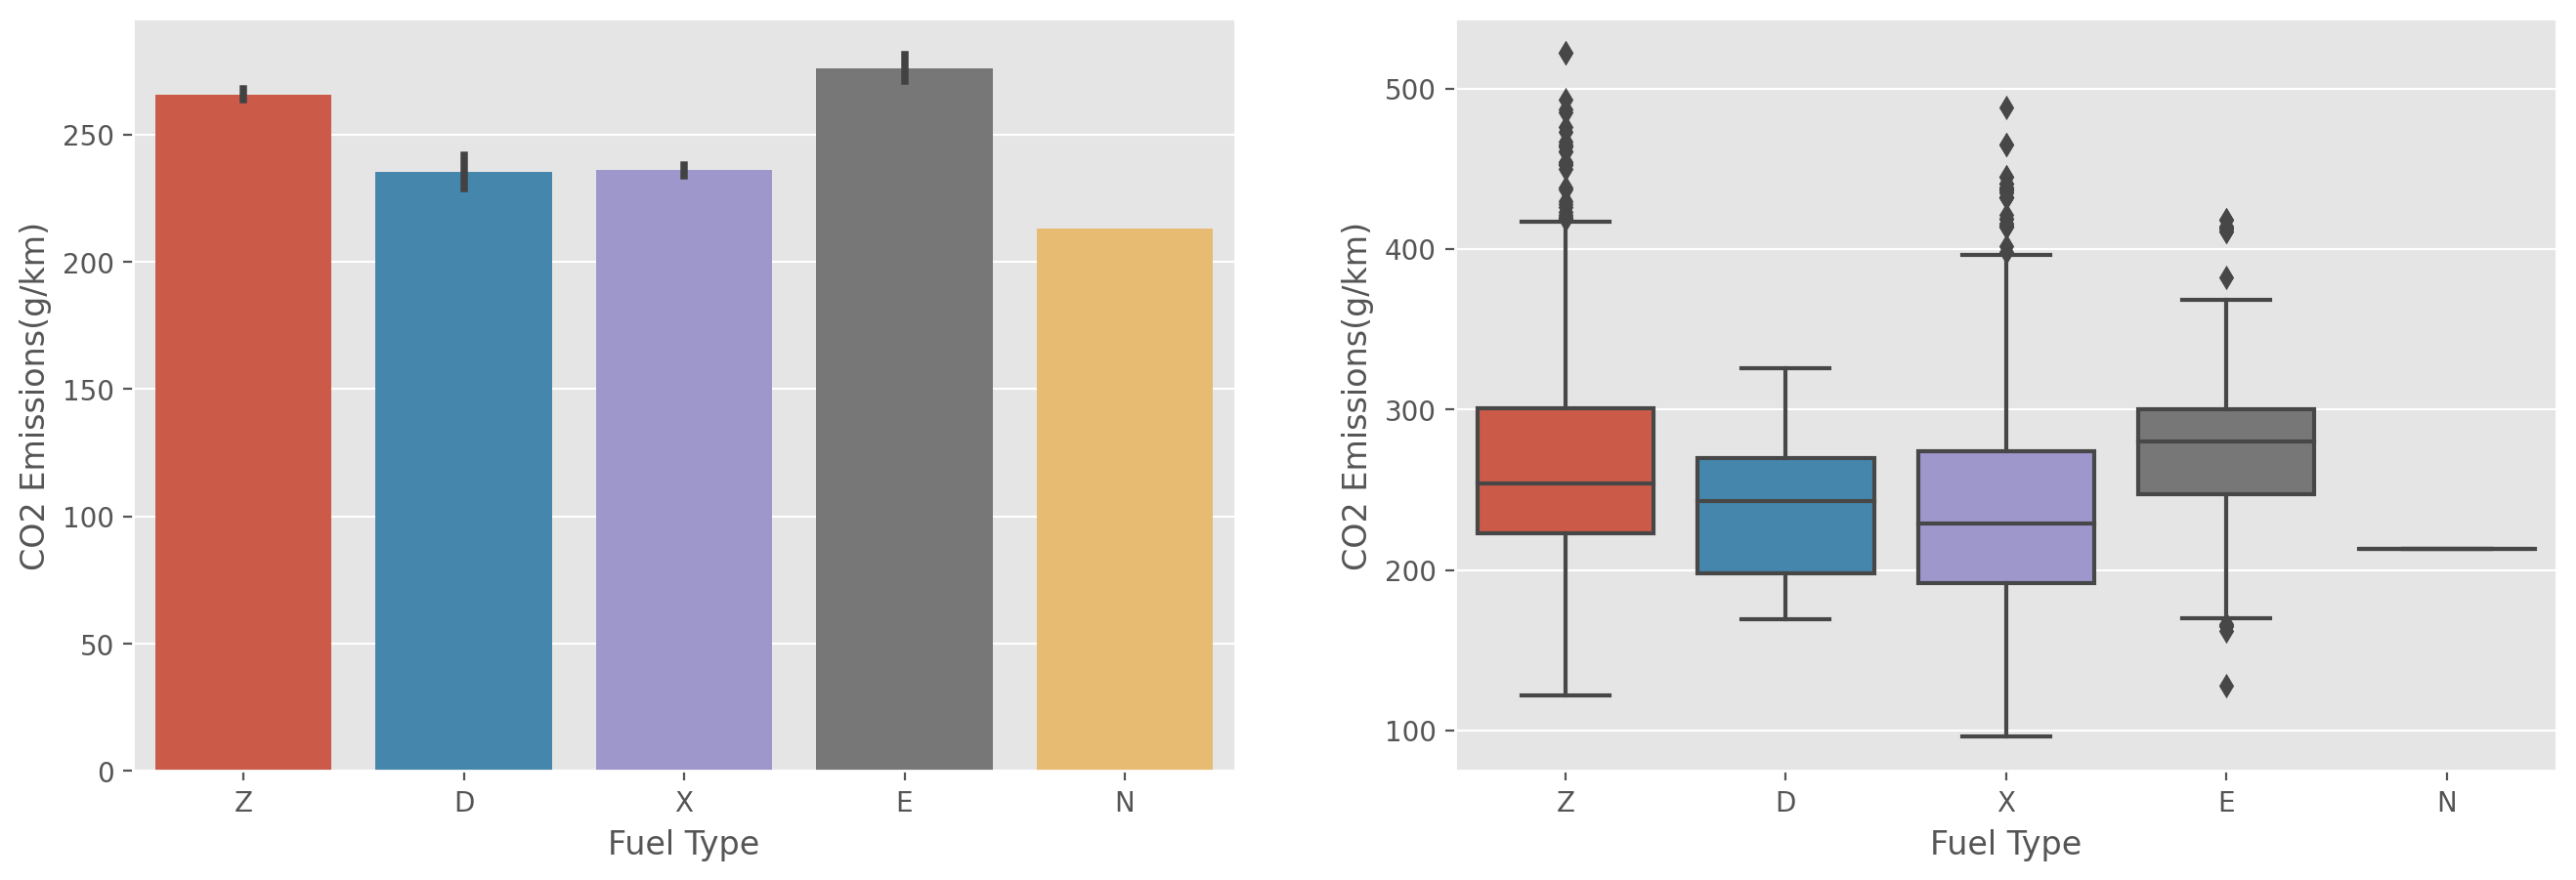

In [31]:
# CO2 Emissions affected by Fuel Type
plt.figure(figsize =(16,5),dpi =200)
plt.subplot(1,2,1)
sns.barplot(x ="Fuel Type",y ="CO2 Emissions(g/km)",data  =data)
plt.subplot(1,2,2)
sns.boxplot(x ="Fuel Type",y ="CO2 Emissions(g/km)",data  =data)

plt.show()

In [32]:
data.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().sort_values(ascending = False)

Fuel Type
E    276.048485
Z    265.731284
X    235.977953
D    235.238095
N    213.000000
Name: CO2 Emissions(g/km), dtype: float64

<Axes: xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

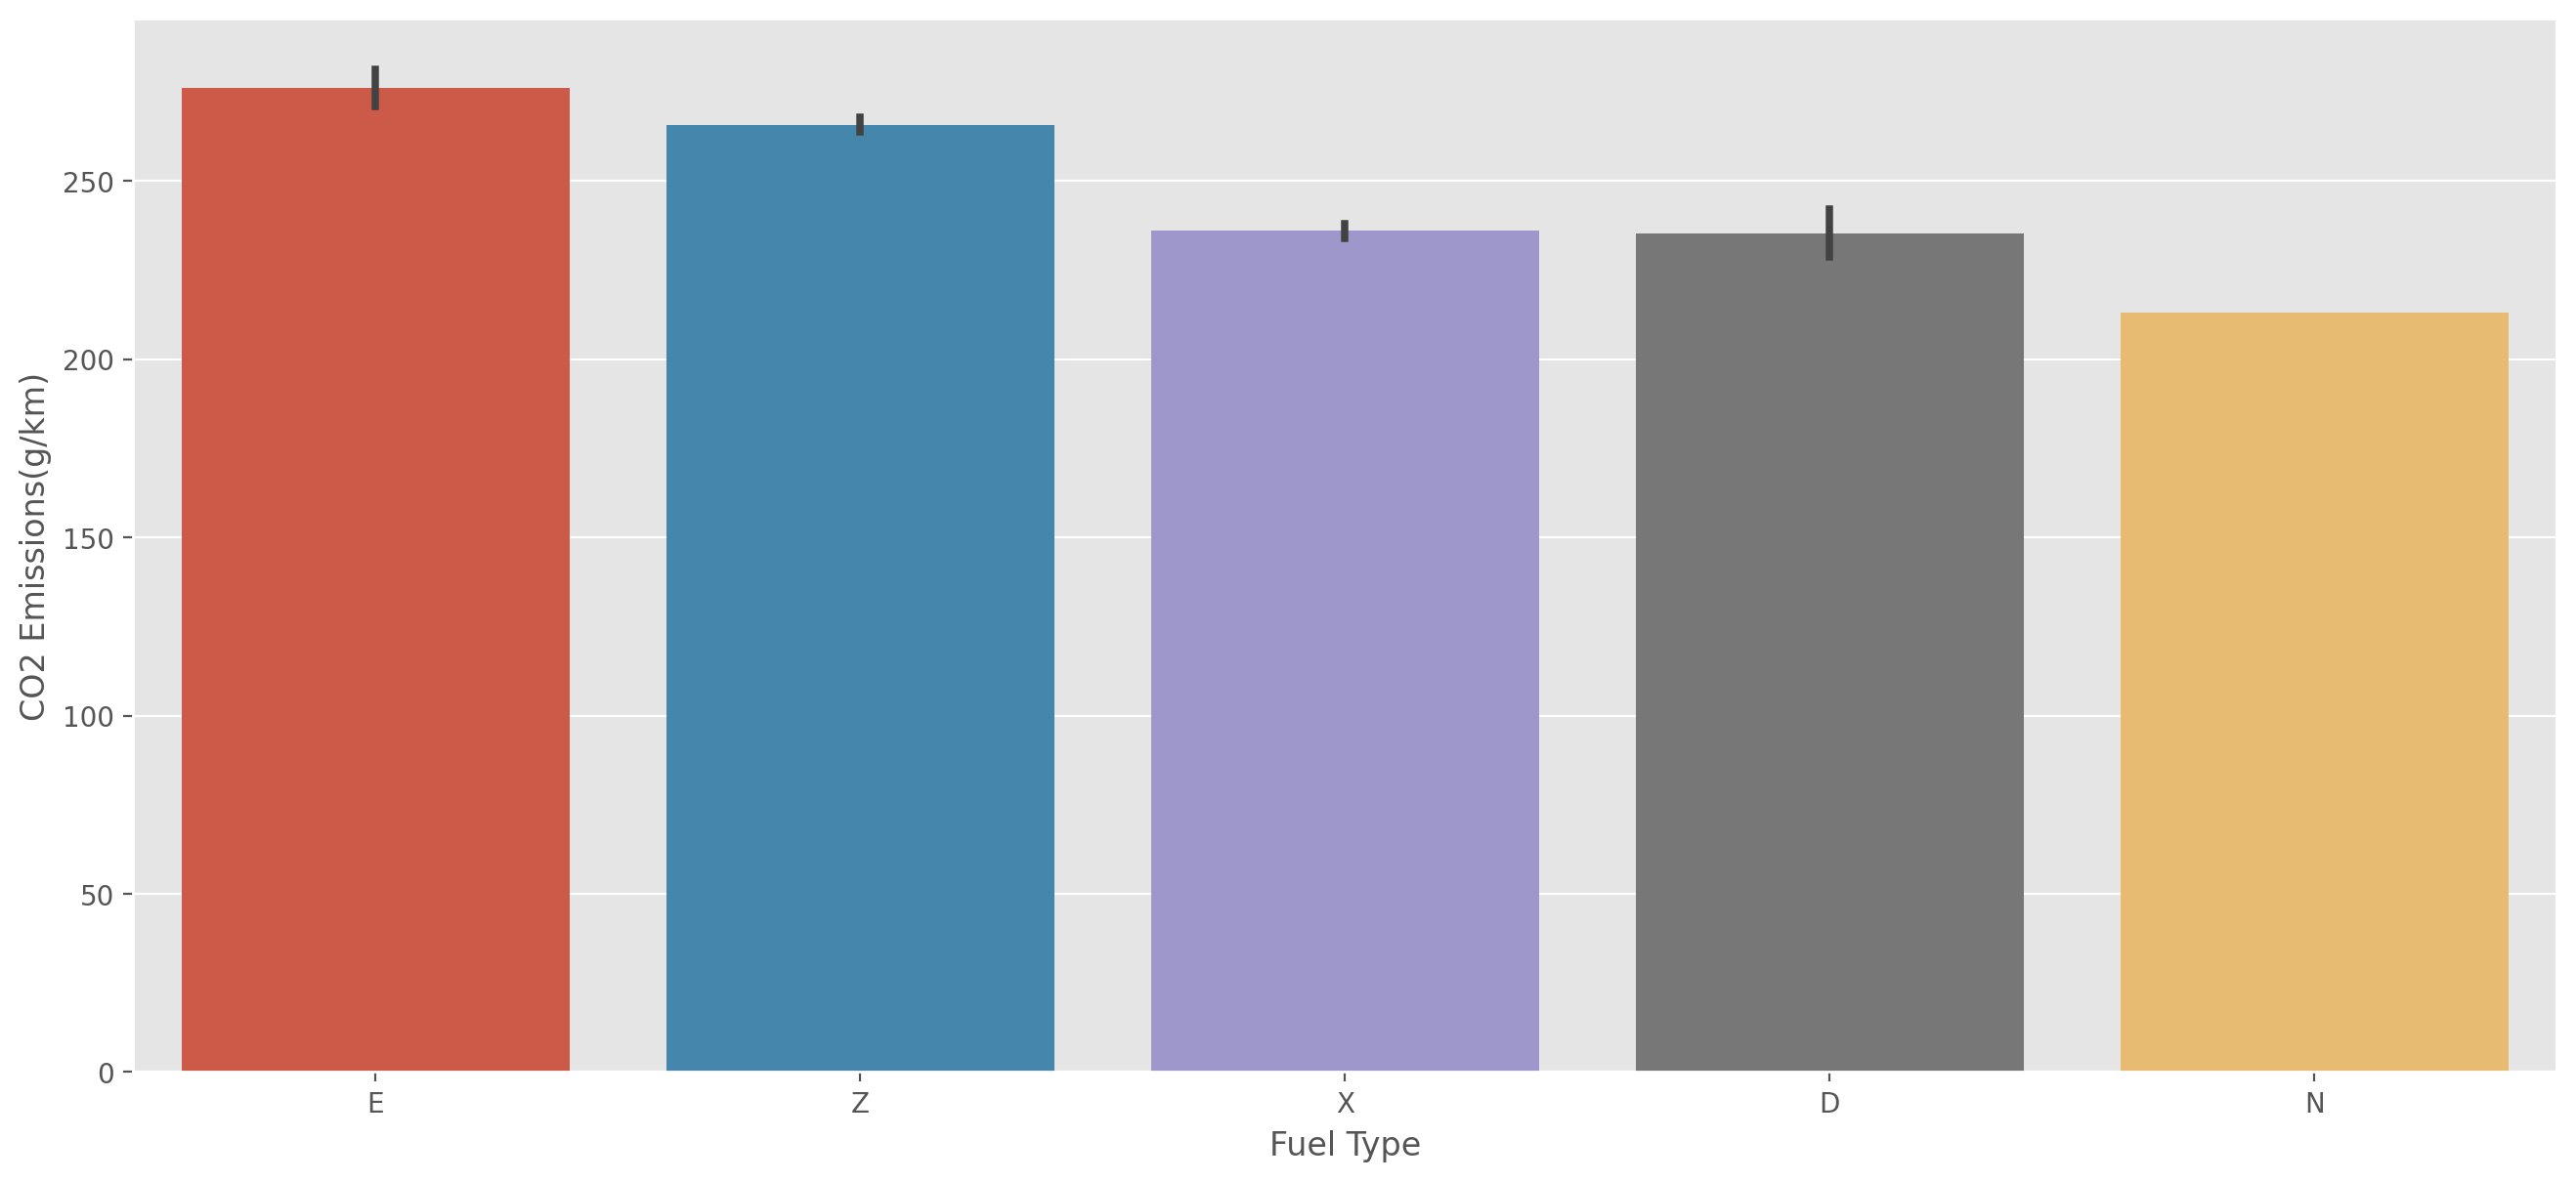

In [33]:
data_desc = data.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().sort_values(ascending = False).index
plt.figure(figsize =(16,7),dpi =200)
sns.barplot(x ="Fuel Type", y ="CO2 Emissions(g/km)",data = data,order=data_desc)

- **Flue type('E') is provid more CO2 Emissions**

In [34]:
data.Transmission.value_counts()

AS6     1139
AS8     1056
M6       773
A6       684
AM7      383
A8       378
AS7      283
A9       263
AV       241
M5       168
AS10     151
AM6      107
AV7       92
AV6       89
A5        78
M7        78
AS9       65
A4        61
AM8       45
A7        44
AV8       34
A10       28
AS5       26
AV10       9
AM5        4
AS4        2
AM9        1
Name: Transmission, dtype: int64

<Axes: xlabel='count', ylabel='Transmission'>

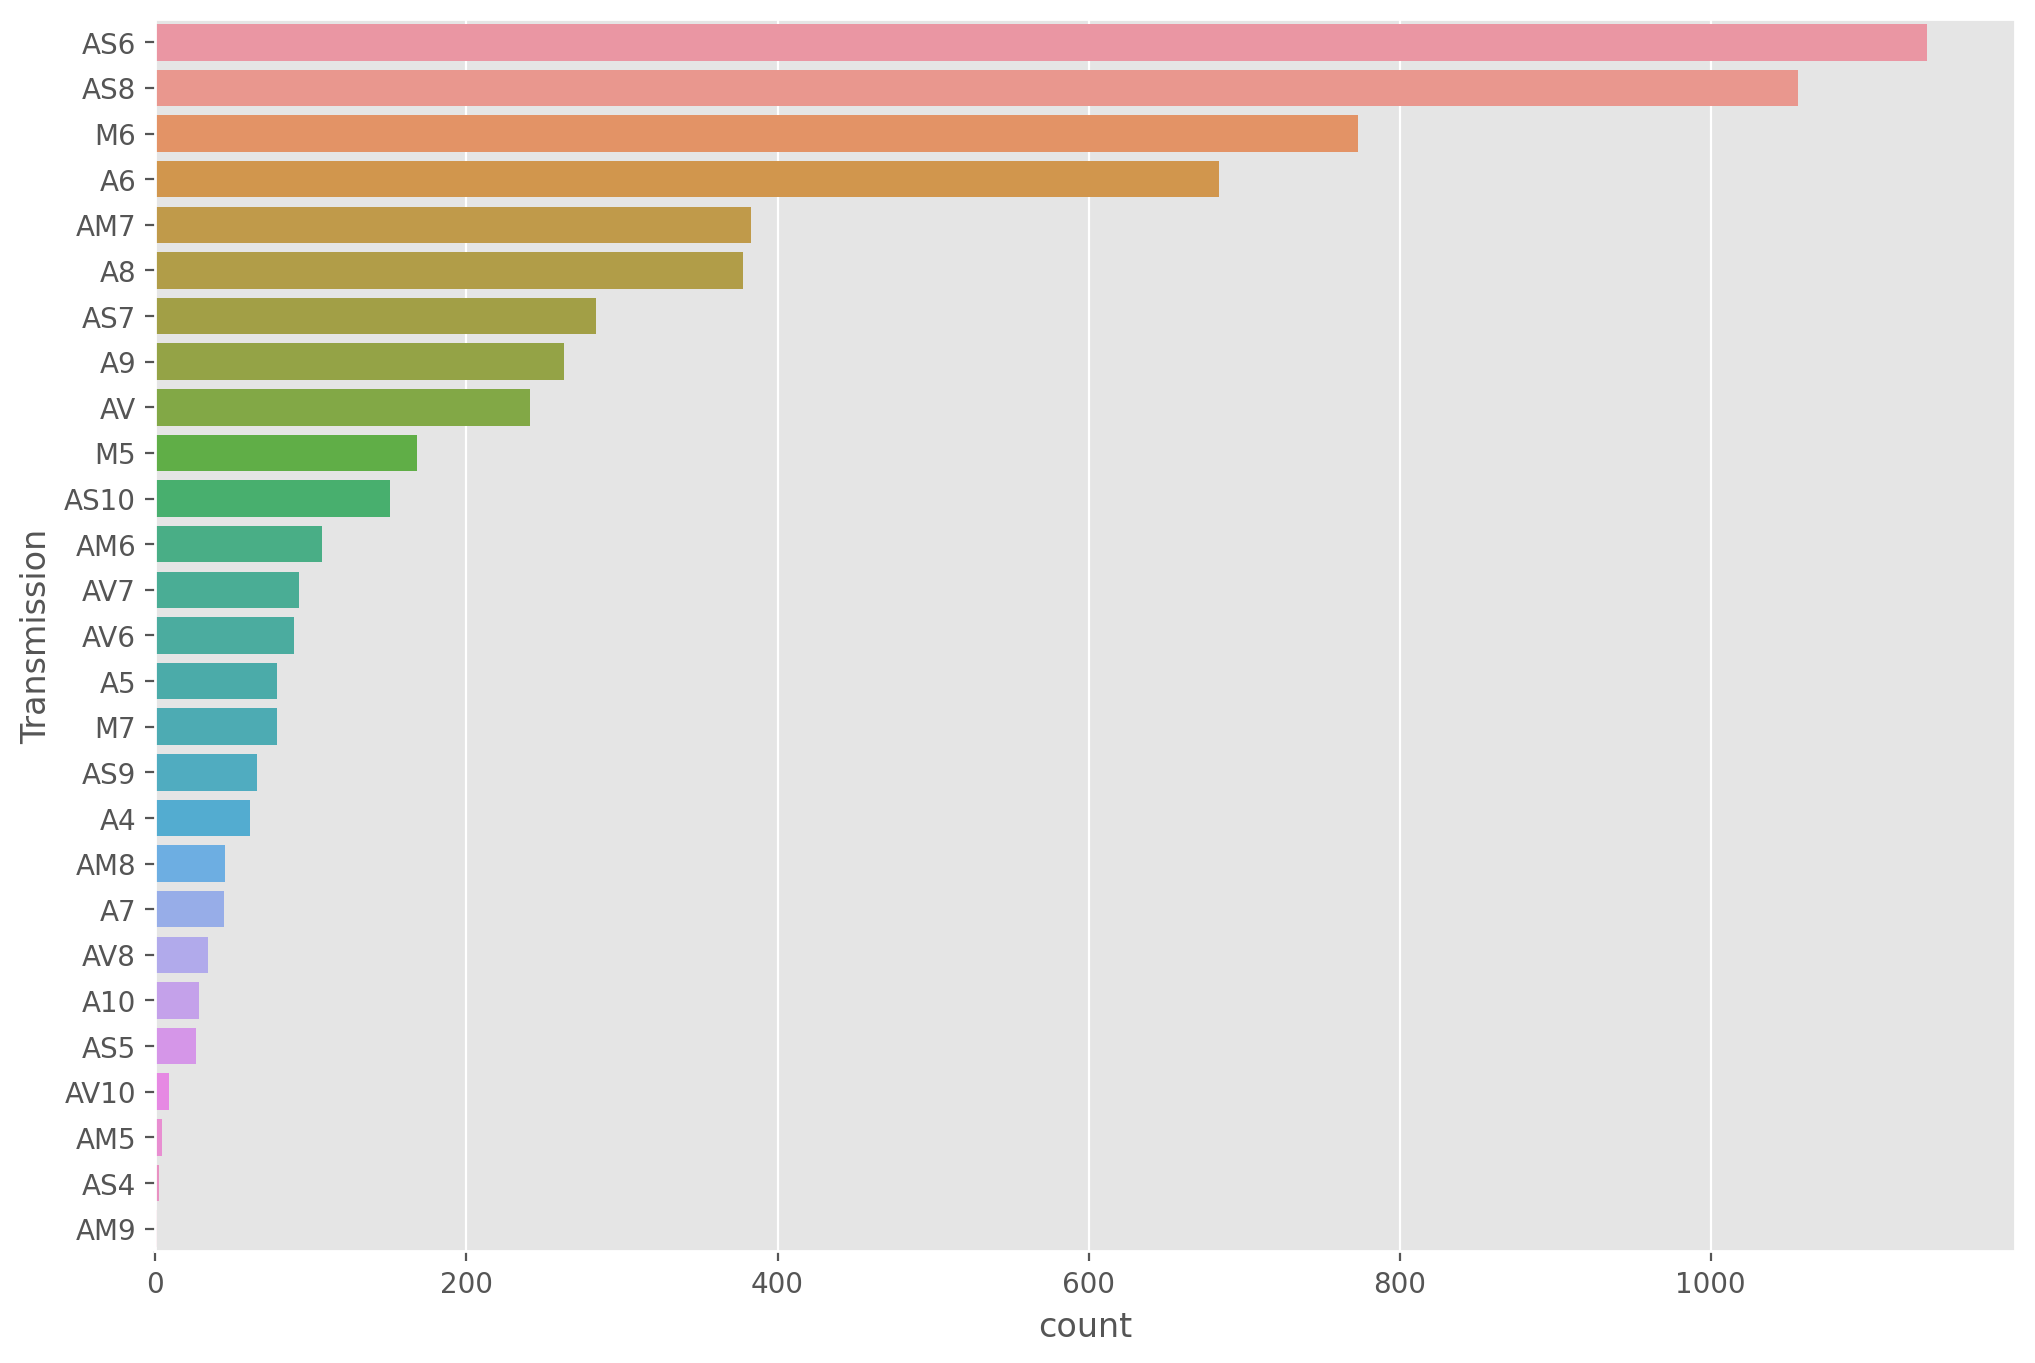

In [35]:
# Transmission
order_Transmission = data.Transmission.value_counts().index
plt.figure(figsize =(12,8),dpi =200)
sns.countplot(y ="Transmission",data = data, order = order_Transmission)

- **Transmission('AS6') are more purches**
- **Transmission('AM9') are less porches**

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Transmission'>

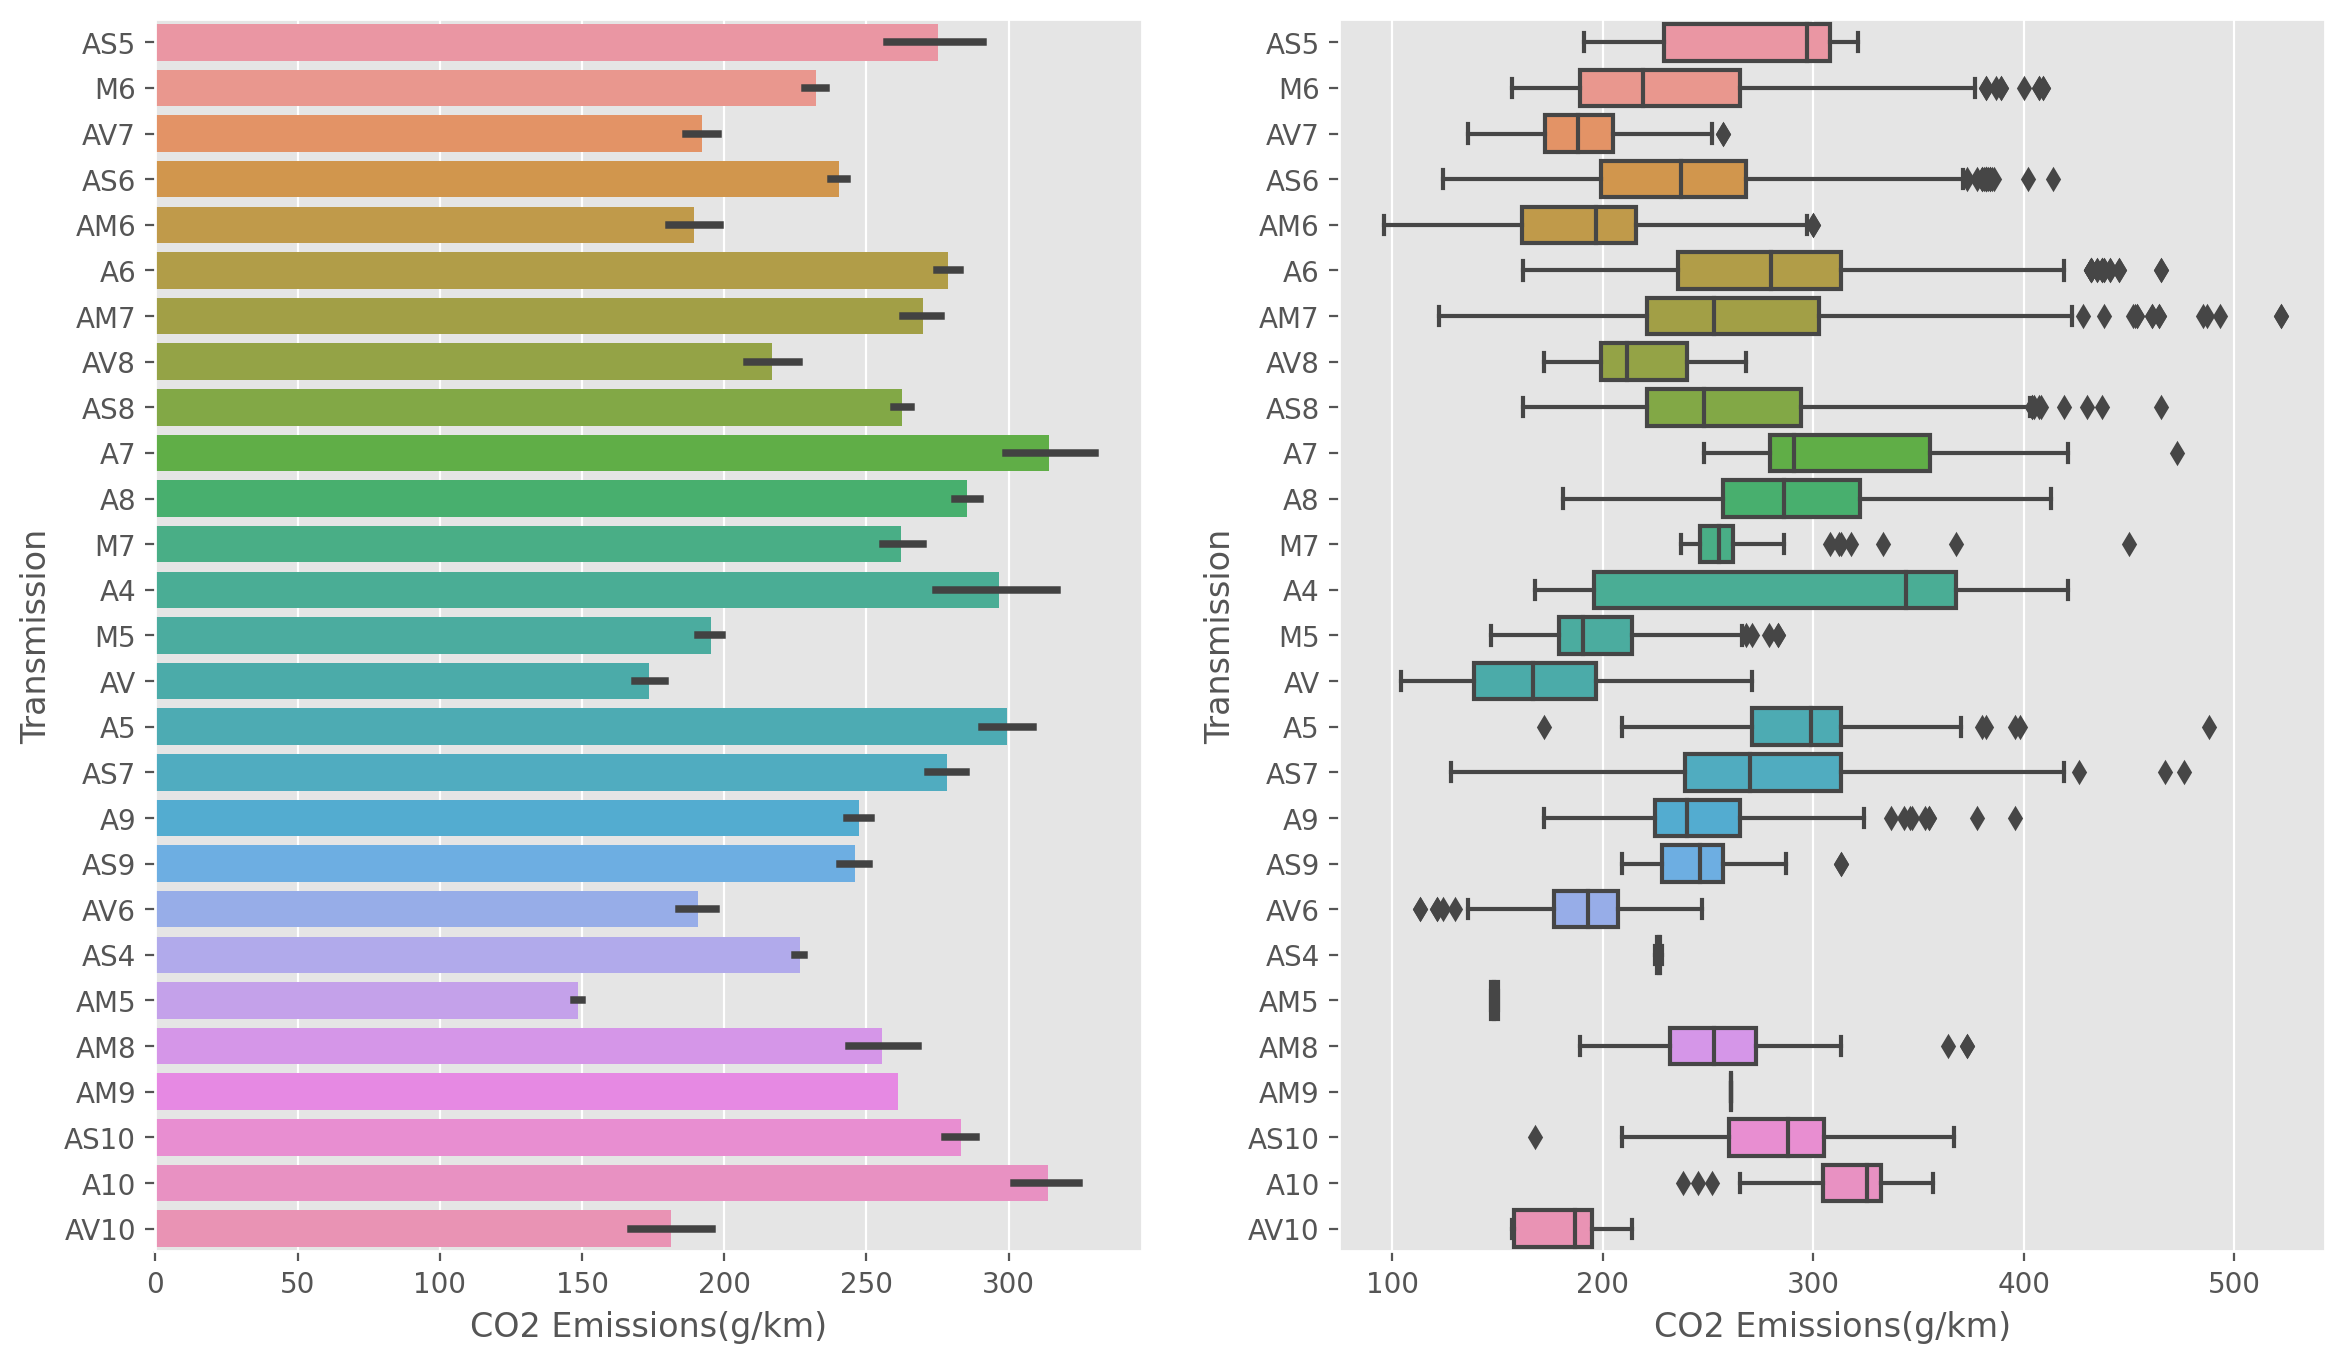

In [36]:
# CO2 Emissions affected by Transmission
plt.figure(figsize =(14,8),dpi =200)
plt.subplot(1,2,1)
sns.barplot(x ="CO2 Emissions(g/km)",  y ="Transmission",data = data)
plt.subplot(1,2,2)
sns.boxplot(x ="CO2 Emissions(g/km)",  y ="Transmission",data = data)

In [37]:
data.groupby(by ="Transmission")["CO2 Emissions(g/km)"].mean().sort_values(ascending = False)

Transmission
A7      314.272727
A10     313.964286
A5      299.371795
A4      296.590164
A8      285.415344
AS10    283.125828
A6      278.798246
AS7     278.431095
AS5     275.115385
AM7     269.856397
AS8     262.435606
M7      262.025641
AM9     261.000000
AM8     255.622222
A9      247.368821
AS9     245.815385
AS6     240.277436
M6      232.157827
AS4     226.500000
AV8     216.735294
M5      195.178571
AV7     192.260870
AV6     190.752809
AM6     189.280374
AV10    181.444444
AV      173.481328
AM5     148.500000
Name: CO2 Emissions(g/km), dtype: float64

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Transmission'>

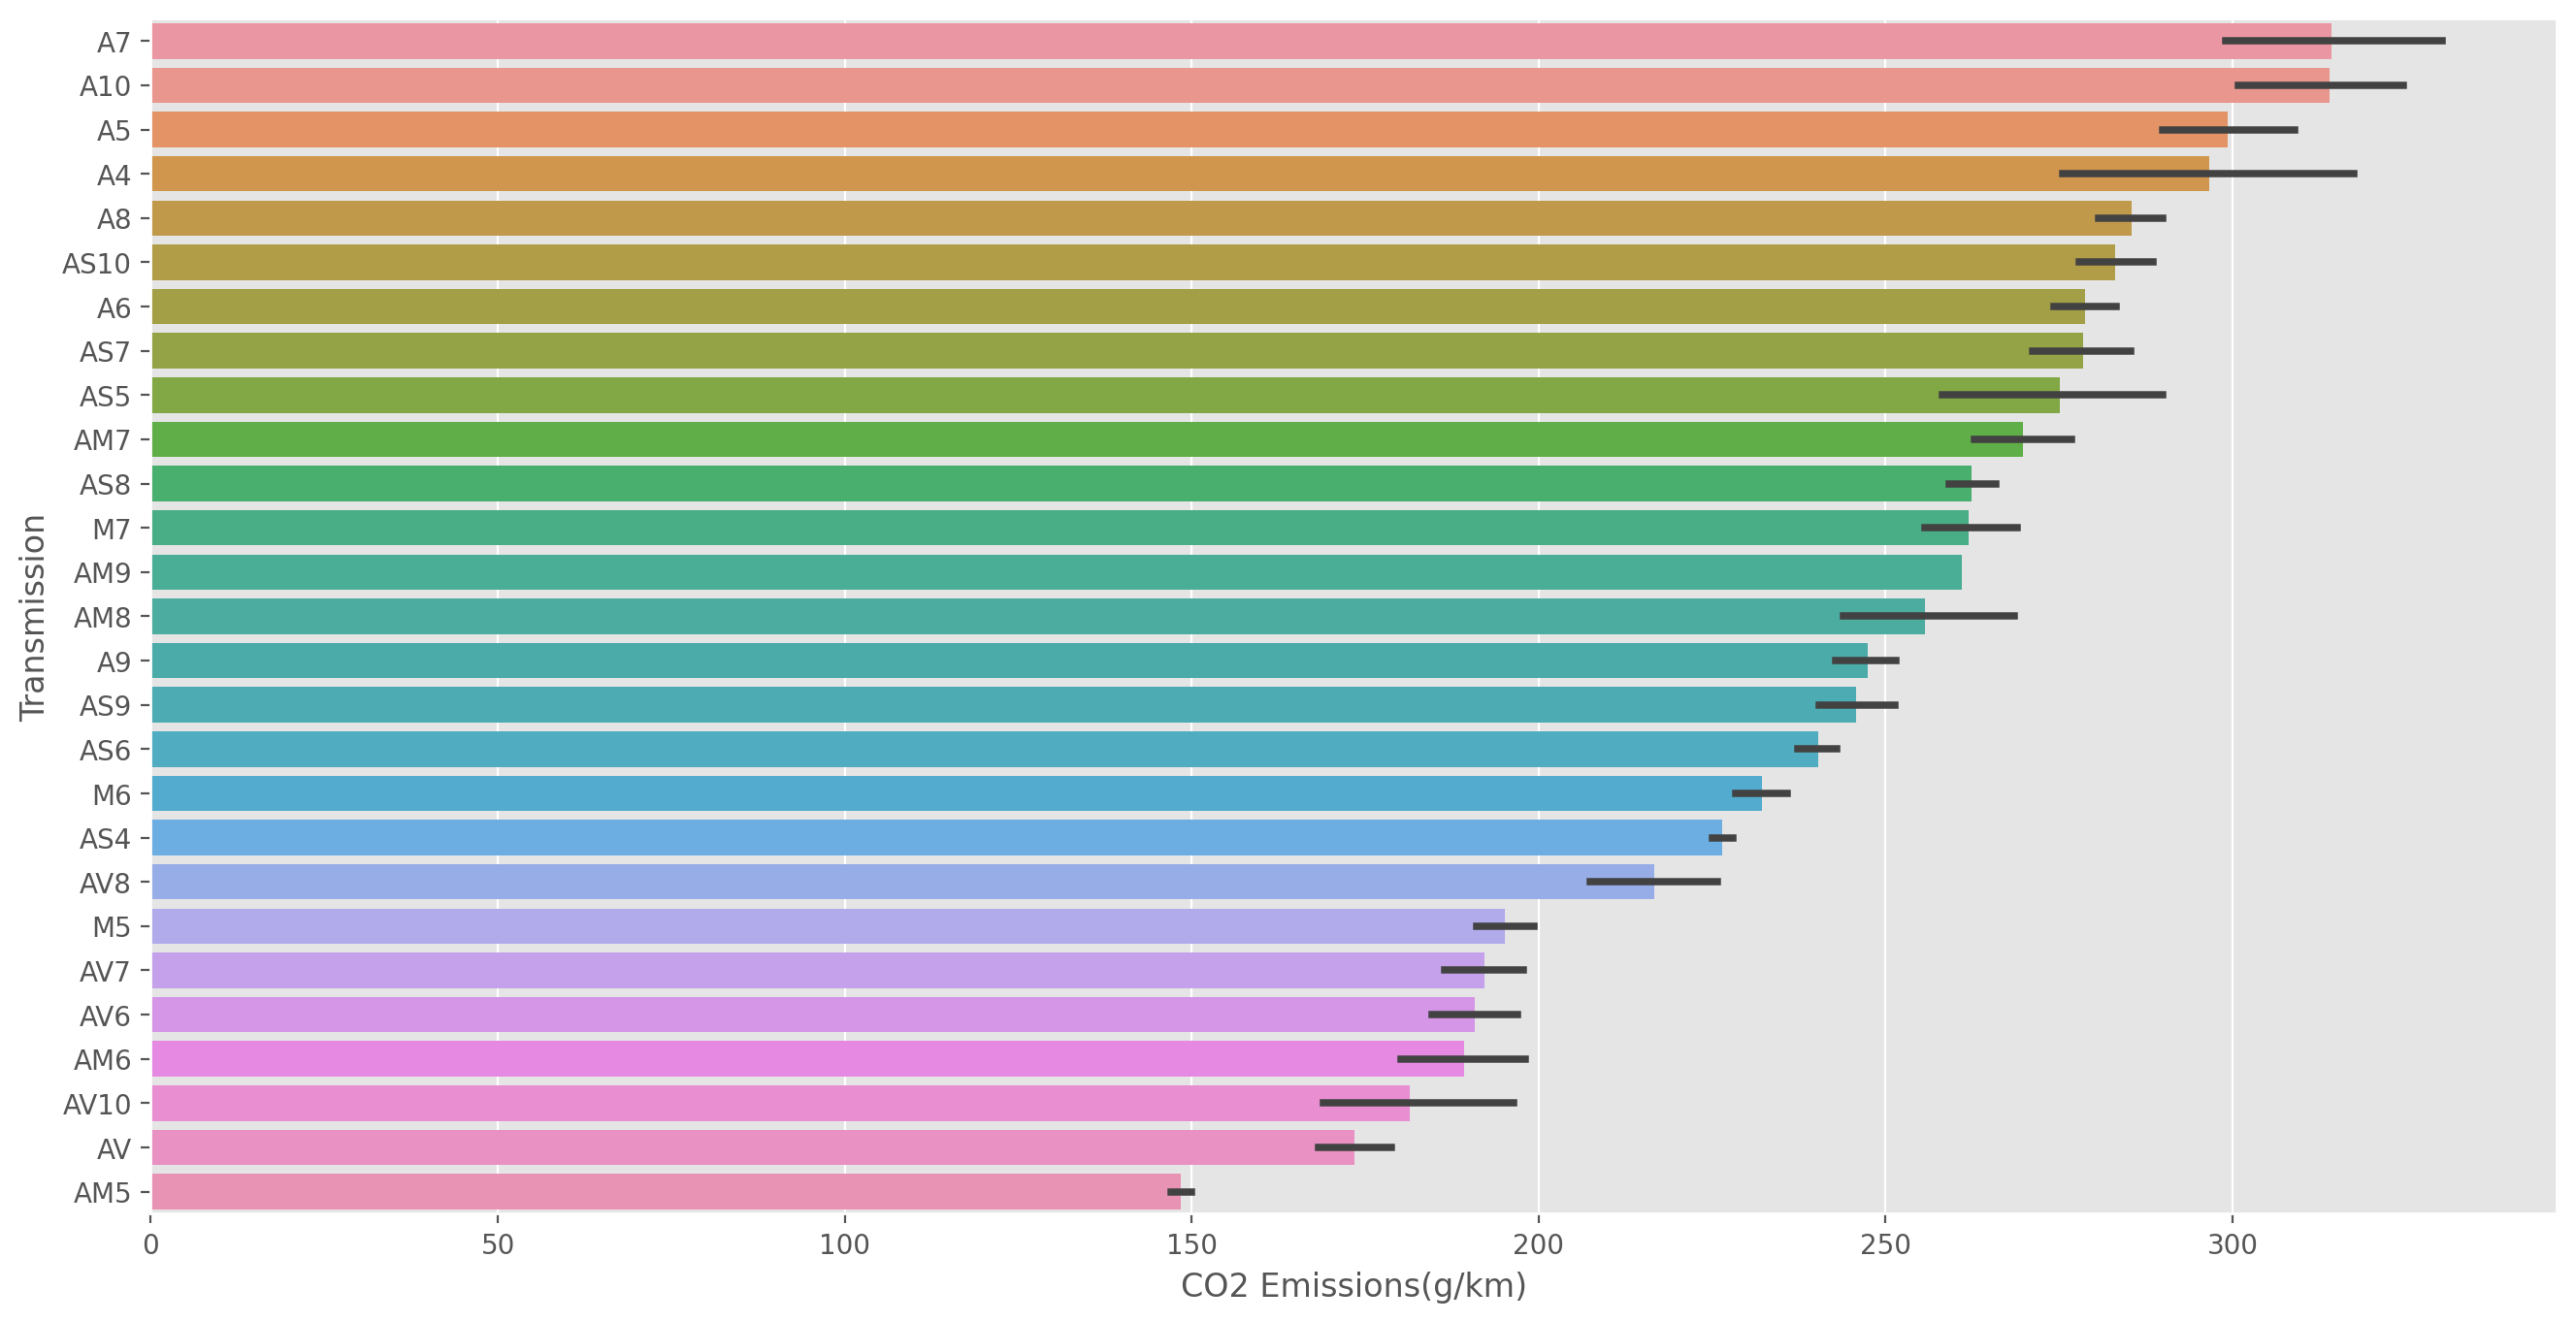

In [38]:
data_desc = data.groupby(by ="Transmission")["CO2 Emissions(g/km)"].mean().sort_values(ascending = False).index
plt.figure(figsize =(16,8),dpi =200)
sns.barplot(x ="CO2 Emissions(g/km)",  y ="Transmission",data = data,order =data_desc)

- **Transmission('A7') are produce more CO2 Emissions**
- **Transmission('AM5') are produce less CO2 Emissions**

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Transmission'>

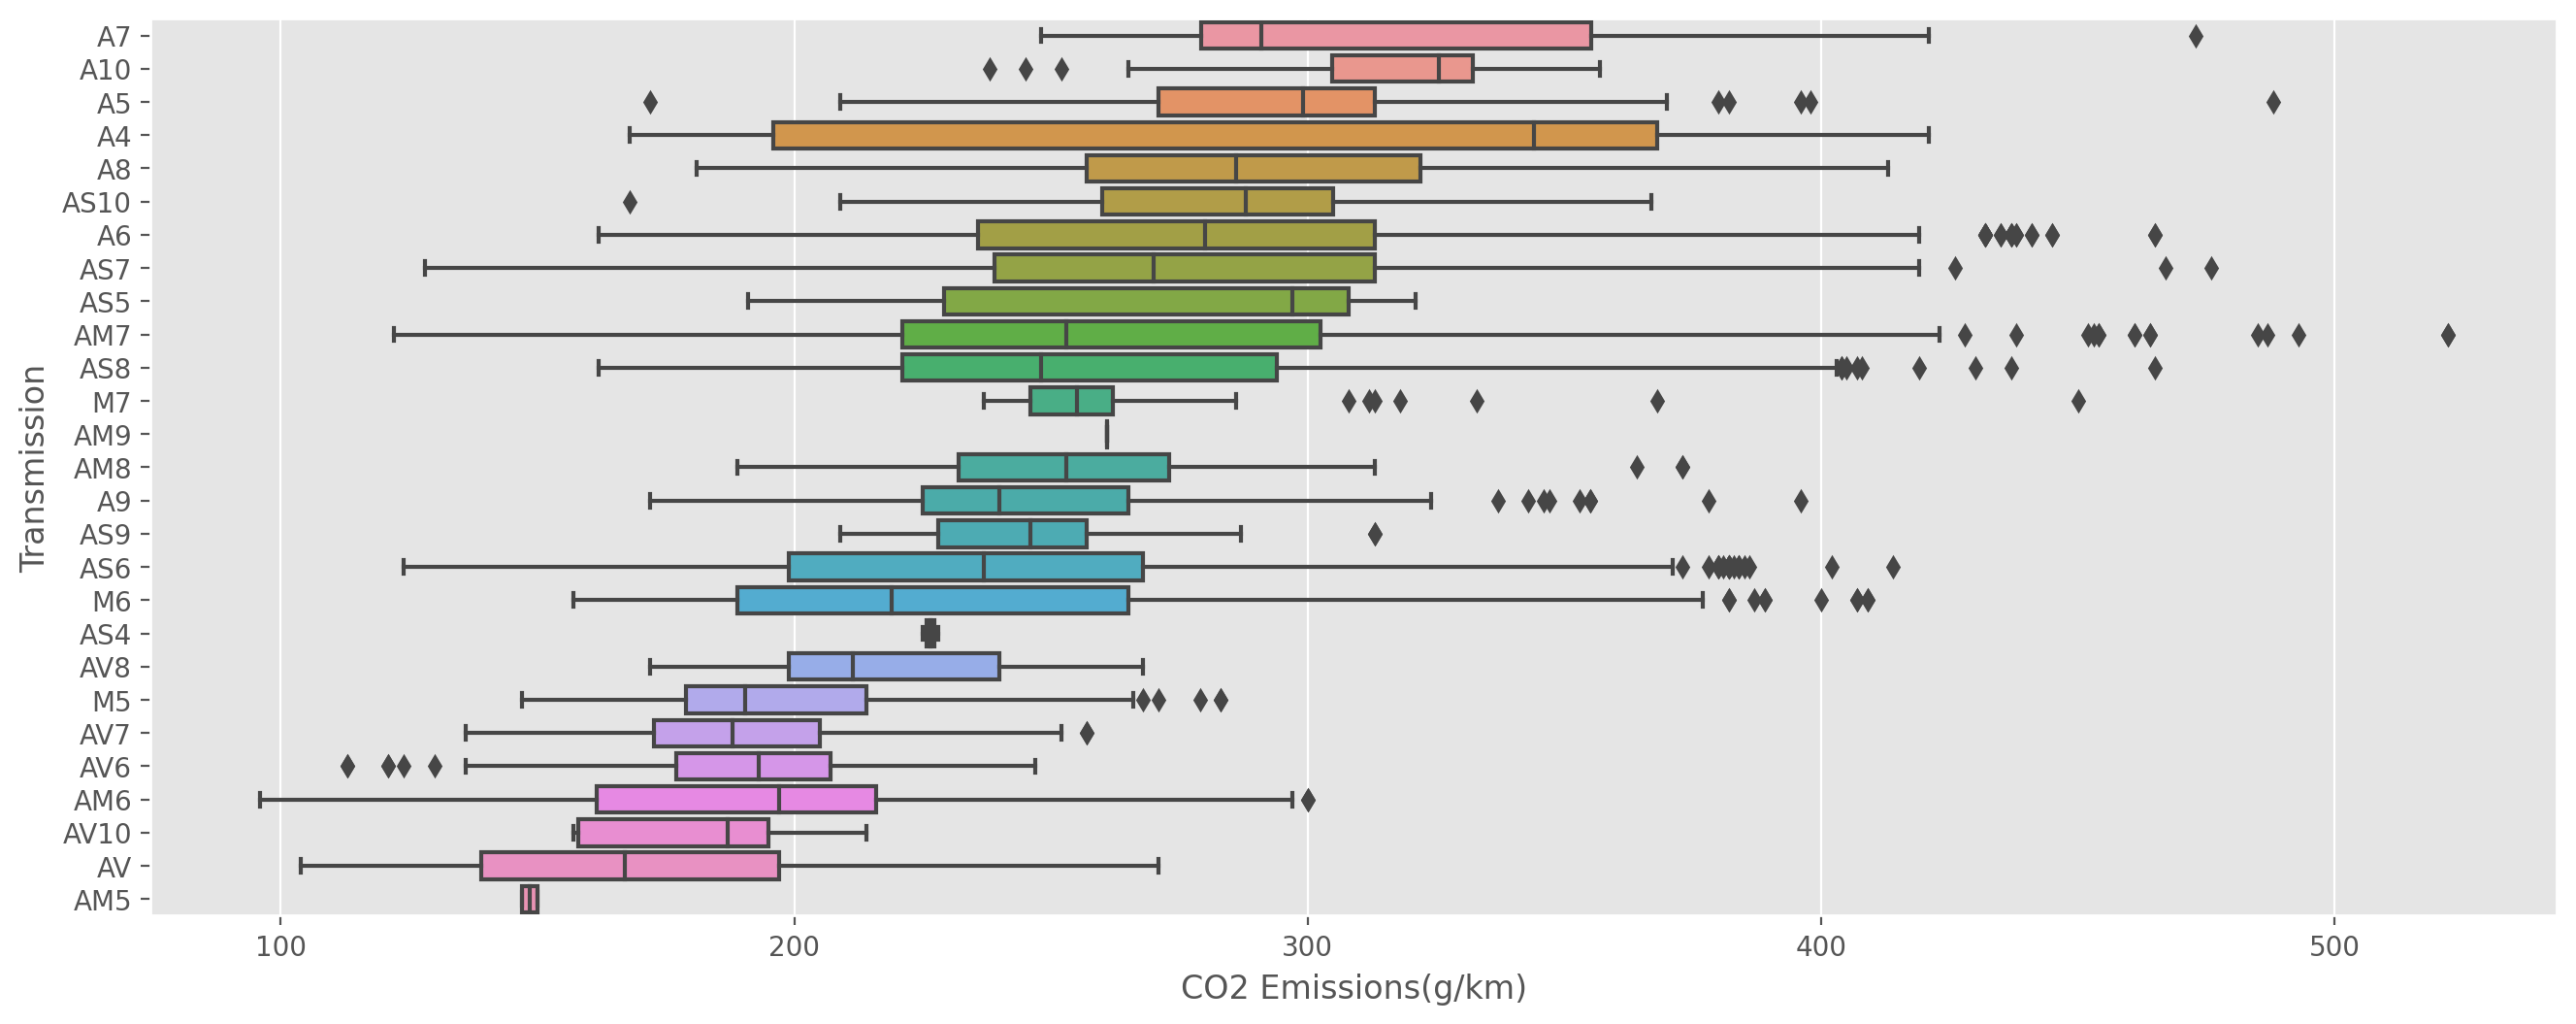

In [39]:
plt.figure(figsize= (16,6),dpi = 200)
sns.boxplot(x ="CO2 Emissions(g/km)",  y ="Transmission",data = data, order =data_desc)

<Axes: xlabel='Fuel Consumption Comb (L/100 km)', ylabel='Density'>

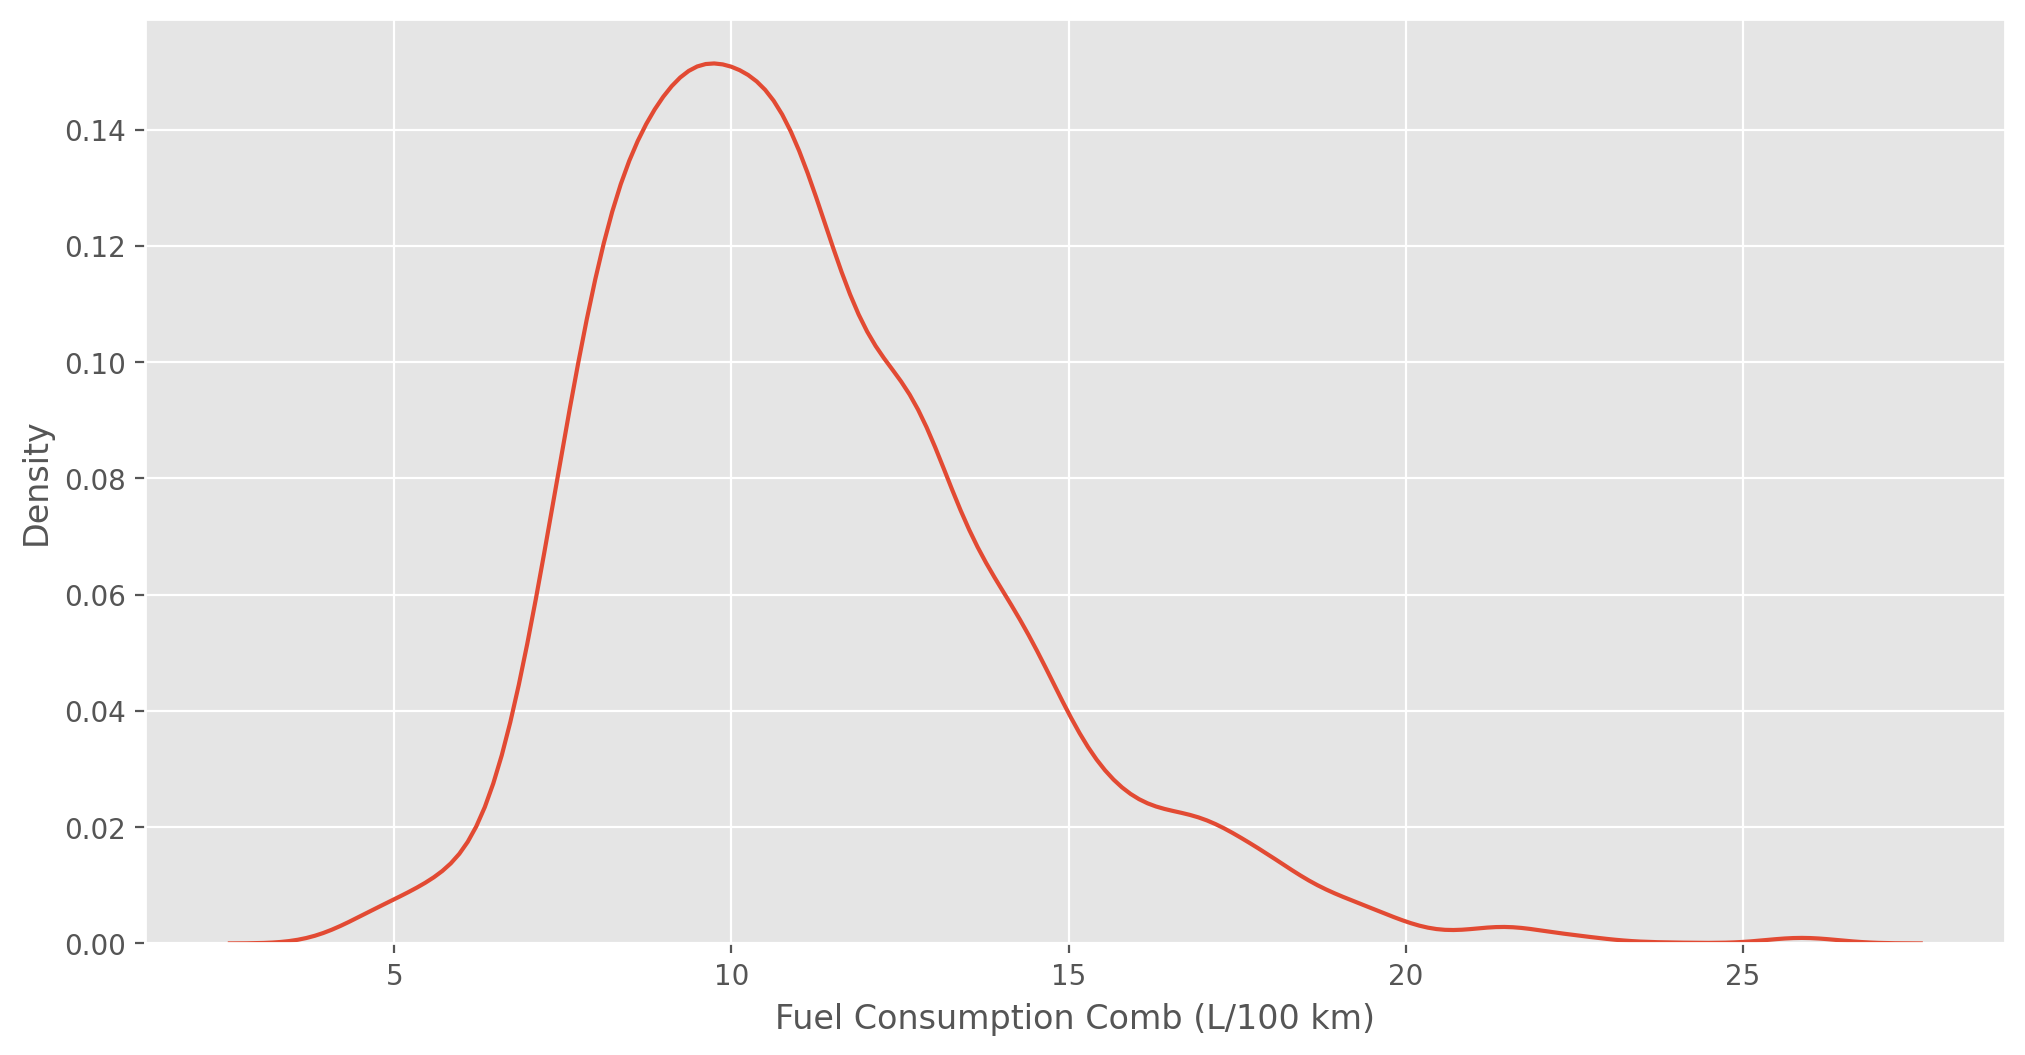

In [40]:
# Fuel Consumption Comb (L/100 km)
plt.figure(figsize =(12,6),dpi =200)
sns.distplot(data["Fuel Consumption Comb (L/100 km)"], hist = False)

<Axes: xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

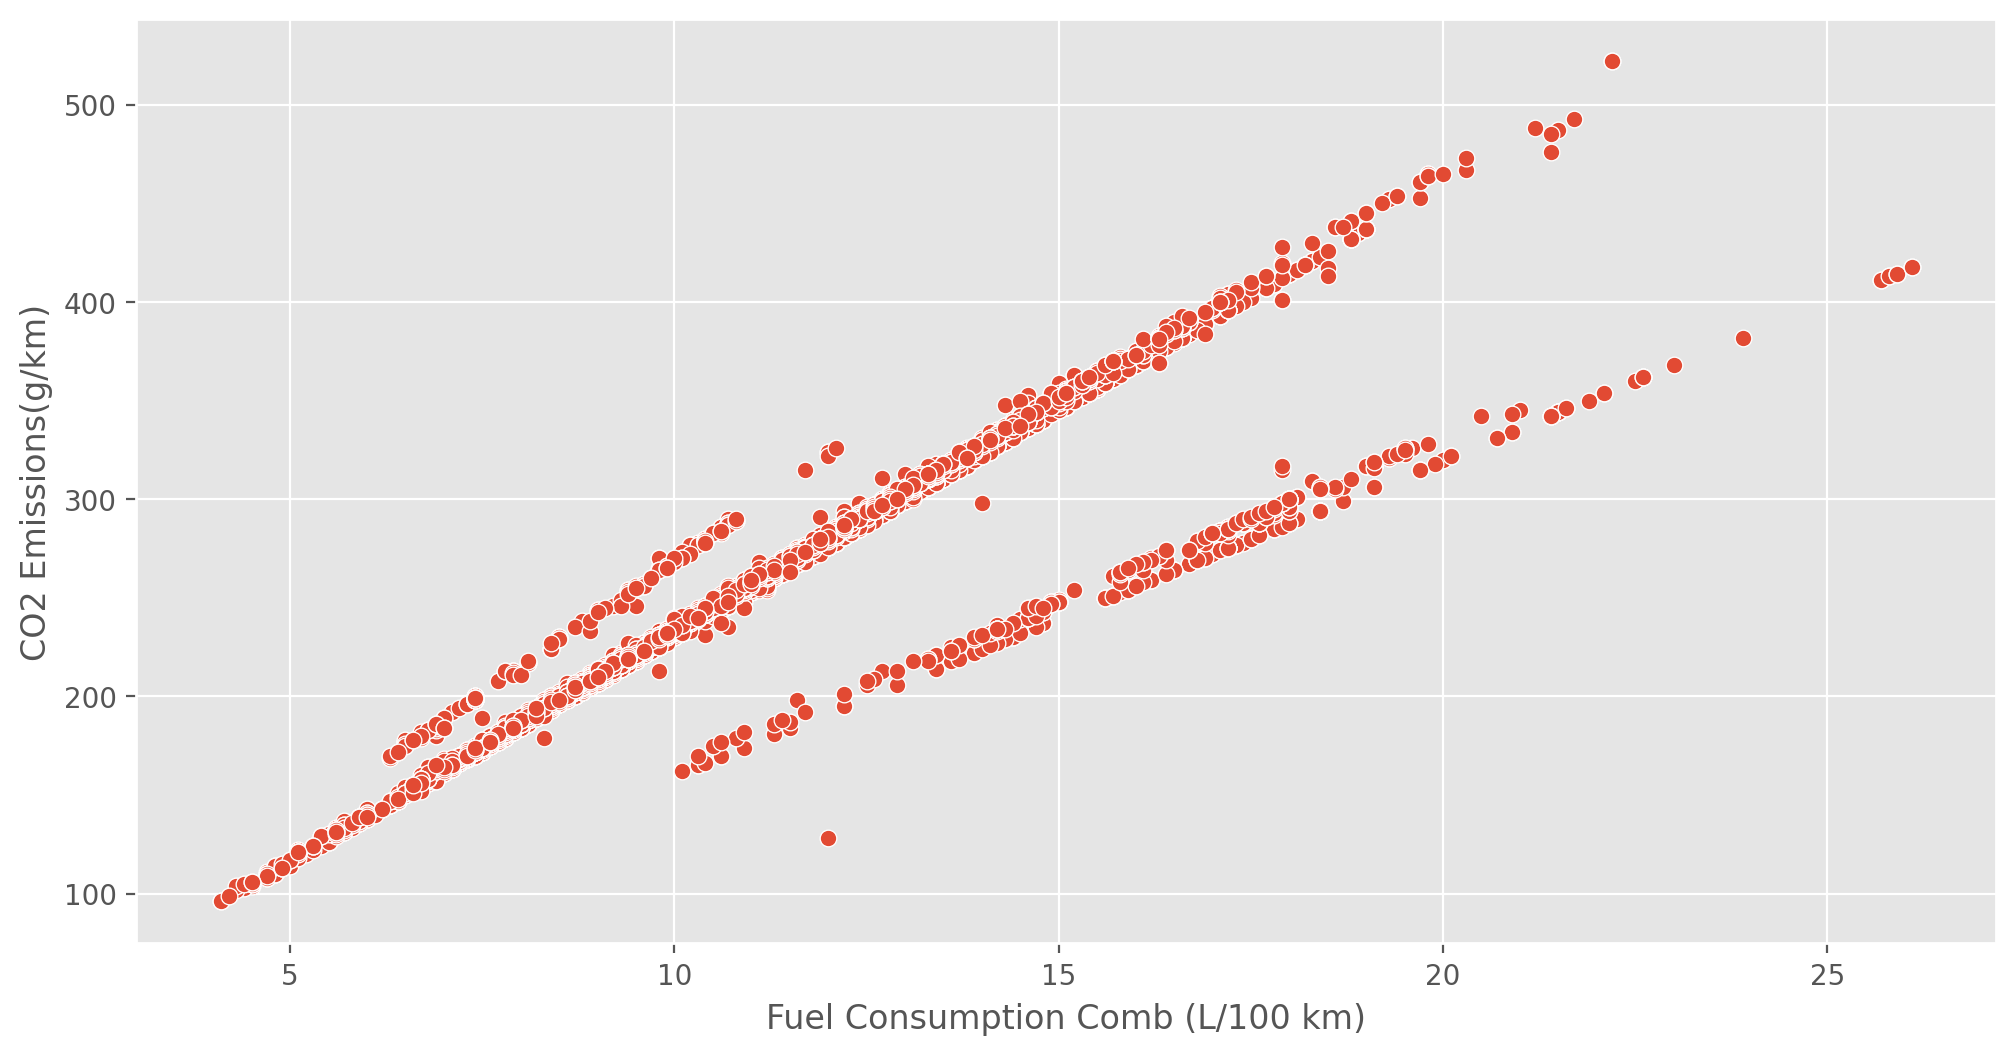

In [41]:
# CO2 Emissions affected by Fuel consumpsion 
plt.figure(figsize =(12,6),dpi =200)
sns.scatterplot(x ="Fuel Consumption Comb (L/100 km)",y ="CO2 Emissions(g/km)",data= data)

In [42]:
data.drop('Cylinders',axis =1).corr()

,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.834228,0.766817,0.820146,-0.762955,0.854802
Fuel Consumption City (L/100 km),0.834228,1.000000,0.950811,0.994052,-0.927640,0.918756
Fuel Consumption Hwy (L/100 km),0.766817,0.950811,1.000000,0.978607,-0.891892,0.883424
Fuel Consumption Comb (L/100 km),0.820146,0.994052,0.978607,1.000000,-0.925801,0.916840
Fuel Consumption Comb (mpg),-0.762955,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
CO2 Emissions(g/km),0.854802,0.918756,0.883424,0.916840,-0.906783,1.000000


<Axes: >

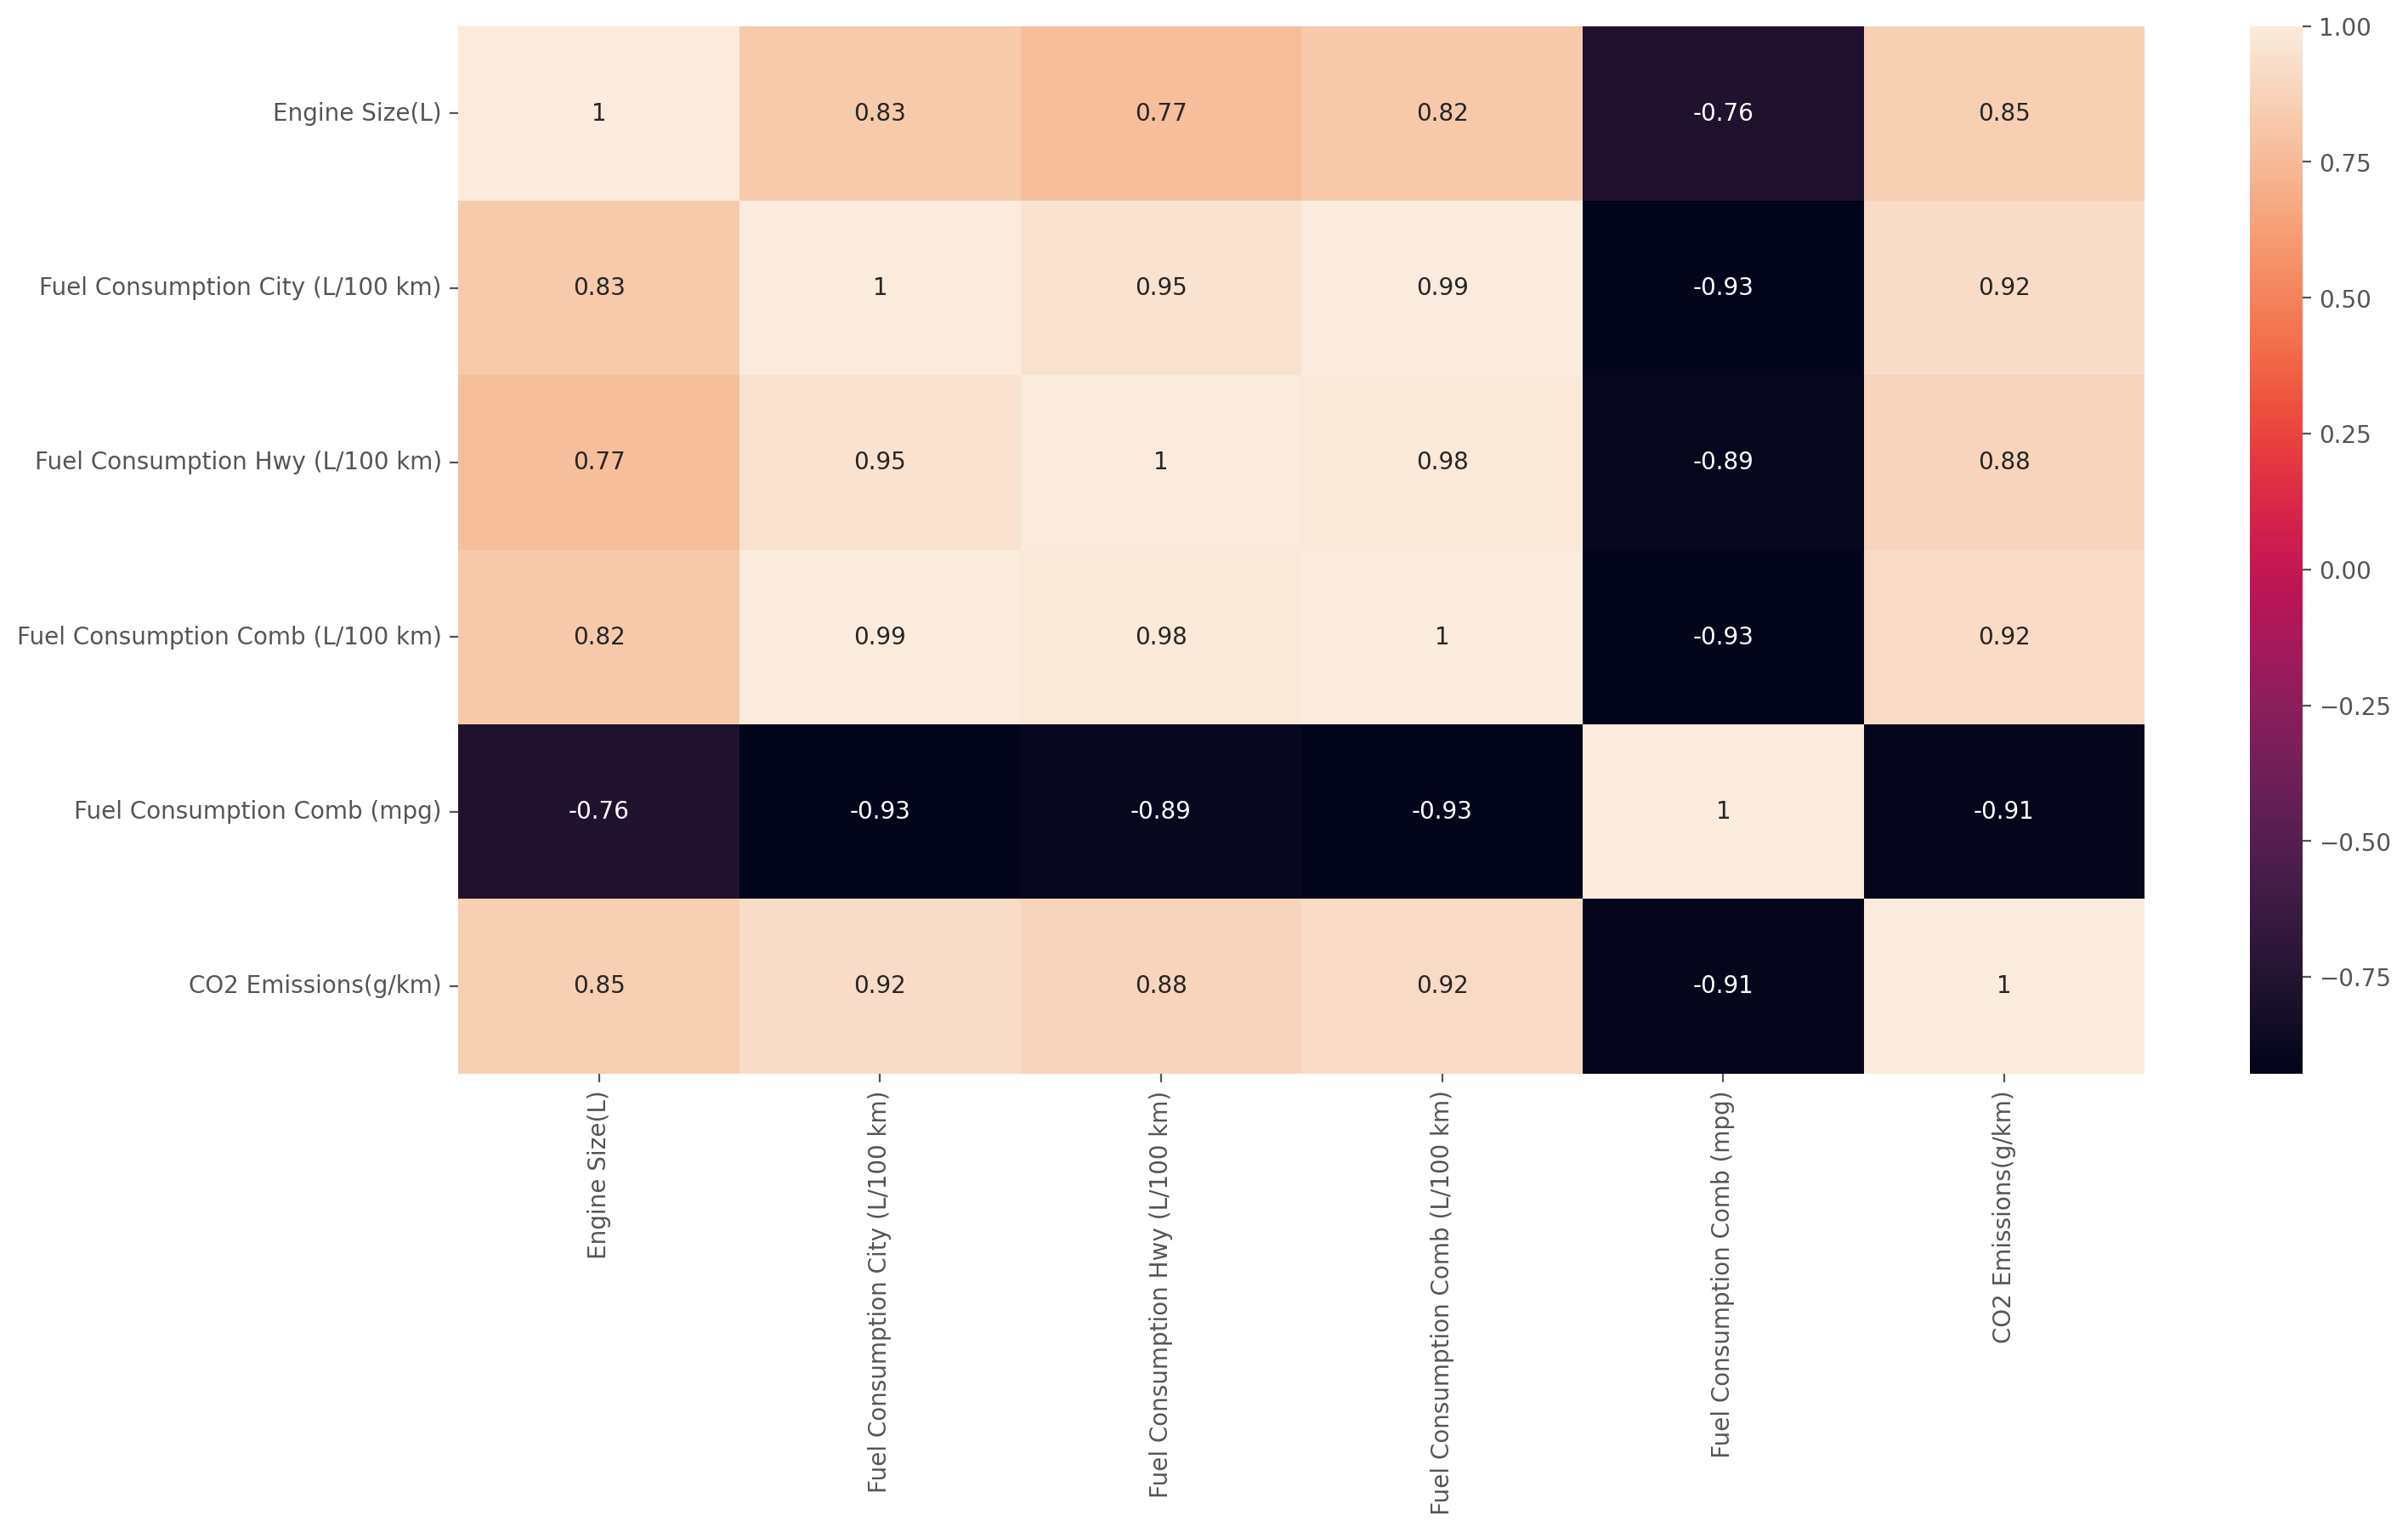

In [43]:
# Cheaking collenior (multicollinearity)
cols = ['Engine Size(L)','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']
plt.figure(figsize=(16,8), dpi=200)
sns.heatmap(data[cols].corr(), annot = True)

---
---